In [1]:
!git clone https://github.com/facebookresearch/DomainBed.git

Cloning into 'DomainBed'...
remote: Enumerating objects: 1263, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1263 (delta 3), reused 4 (delta 0), pack-reused 1252
Receiving objects: 100% (1263/1263), 1.06 MiB | 27.01 MiB/s, done.
Resolving deltas: 100% (734/734), done.


In [2]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import pickle
import tqdm
import torch


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Convert images to /content/...


In [5]:
!pip install wilds
# 安装wilds模块
# 使用wilds可以帮助研究人员更好地评估他们的机器学习算法在实际应用中的性能

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached

In [1]:
import sys

sys.path.append('/content/DomainBed/domainbed/scripts')
sys.path.append('/content/DomainBed/domainbed/datasets')
sys.path.append('/content/DomainBed/domainbed')

In [4]:
from datasets import SpawriousO2O_easy
from datasets import SpawriousO2O_medium
from datasets import SpawriousO2O_hard
from datasets import SpawriousM2M_easy
from datasets import SpawriousM2M_medium
from datasets import SpawriousM2M_hard

In [5]:
from download import download_spawrious

In [7]:
data_dir = "/content/drive/MyDrive/ip1"
# 制定下载数据集所需要的目录

download_spawrious(data_dir)
# 使用download模块中的download_spawrious下载函数下载数据集，指定路径为data_dir
# 调用其他函数下载其他数据集

In [13]:
# 创建 SpawriousO2O_easy 类的实例
root_dir="/content/drive/MyDrive/ip1/spawrious224"

spawrious_easy = SpawriousO2O_easy(root_dir, test_envs=[0], hparams={'data_augmentation': True})
spawrious_medium = SpawriousO2O_medium(root_dir, test_envs=[0], hparams={'data_augmentation': True})
spawrious_hard = SpawriousO2O_hard(root_dir, test_envs=[0], hparams={'data_augmentation': True})

In [11]:
drive.flush_and_unmount()

In [12]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
env1 = spawrious_easy[1]
env2 = spawrious_easy[2]
test = spawrious_easy[0]

In [ ]:
env1_medium = spawrious_medium[1]
env2_medium = spawrious_medium[2]
test_medium = spawrious_medium[0]

In [ ]:
env1_hard = spawrious_hard[1]
env2_hard = spawrious_hard[2]
test_hard = spawrious_hard[0]

print(len(env1_hard))
print(len(env2_hard))
print(len(test_hard))

12672
12672
25344


In [ ]:
save_path = '/content/drive/MyDrive/ip/testdata_medium.pt'
torch.save(test_medium, save_path)

In [ ]:
torch.save(test, '/content/drive/MyDrive/ip/testdata.pt')
torch.save(test_medium, '/content/drive/MyDrive/ip/testdata_medium.pt')


check:


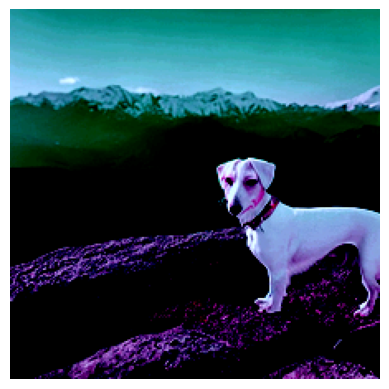

tensor(2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_tensor = env1_hard[3072][0]
label = env1_hard[3072][1]

image_array = image_tensor.numpy()
image_array_rgb = np.transpose(image_array, (1, 2, 0))
plt.imshow(image_array_rgb)
plt.axis('off')  # 关闭坐标轴
plt.show()
print(label)


In [ ]:
bulldog_filter1 = []
bulldog_filter2 = []
for i in range(12288, 12288+96):
  bulldog_filter1.append(env1[i][0])

for i in range(11024, 11024+412):
  bulldog_filter2.append(env2[i][0])



In [ ]:
bulldog_filter_medium1 = []
bulldog_filter_medium2 = []
for i in range(12288, 12288+96):
  bulldog_filter_medium1.append(env1_medium[i][0])

for i in range(11024, 11024+412):
  bulldog_filter_medium2.append(env2_medium[i][0])


In [ ]:
bulldog_filter_hard1 = []
bulldog_filter_hard2 = []
for i in range(12288, 12288+96):
  bulldog_filter_hard1.append(env1_hard[i][0])

for i in range(11024, 11024+412):
  bulldog_filter_hard2.append(env2_hard[i][0])

In [ ]:
import numpy as np

bulldog_filter_hard1_np = np.array(bulldog_filter_hard1)
bulldog_filter_hard2_np = np.array(bulldog_filter_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/bulldog_filter_hard1.npy', bulldog_filter_hard1_np)
np.save('/content/drive/MyDrive/ip1/bulldog_filter_hard2.npy', bulldog_filter_hard2_np)

In [ ]:
print(len(bulldog_filter1))
print(len(bulldog_filter2))

96
412


In [ ]:
bulldog1 = []
bulldog2 = []
for i in range(0, 3072):
  bulldog1.append(env1[i][0])

for i in range(0, 2756):
  bulldog2.append(env2[i][0])

In [ ]:
bulldog_medium1 = []
bulldog_medium2 = []
for i in range(0, 3072):
  bulldog_medium1.append(env1_medium[i][0])

for i in range(0, 2756):
  bulldog_medium2.append(env2_medium[i][0])

In [ ]:
bulldog_hard1 = []
bulldog_hard2 = []
for i in range(0, 3072):
  bulldog_hard1.append(env1_hard[i][0])

for i in range(0, 2756):
  bulldog_hard2.append(env2_hard[i][0])

In [ ]:
bulldog1_np = np.array(bulldog1)
bulldog2_np = np.array(bulldog2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/bulldog1.npy', bulldog1_np)
np.save('/content/drive/MyDrive/ip1/bulldog2.npy', bulldog2_np)


In [ ]:
import numpy as np
bulldog_hard1_np = np.array(bulldog_hard1)
bulldog_hard2_np = np.array(bulldog_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/bulldog_hard1.npy', bulldog_hard1_np)
np.save('/content/drive/MyDrive/ip1/bulldog_hard2.npy', bulldog_hard2_np)

In [ ]:
dachshund_filter1 = []
dachshund_filter2 = []
for i in range(12288+96, 12288+96*2):
  dachshund_filter1.append(env1[i][0])

for i in range(11024+412, 11024+412*2):
  dachshund_filter2.append(env2[i][0])



In [ ]:
dachshund_filter_medium1 = []
dachshund_filter_medium2 = []
for i in range(12288+96, 12288+96*2):
  dachshund_filter_medium1.append(env1_medium[i][0])

for i in range(11024+412, 11024+412*2):
  dachshund_filter_medium2.append(env2_medium[i][0])

In [ ]:
dachshund_filter_hard1 = []
dachshund_filter_hard2 = []
for i in range(12288+96, 12288+96*2):
  dachshund_filter_hard1.append(env1_hard[i][0])

for i in range(11024+412, 11024+412*2):
  dachshund_filter_hard2.append(env2_hard[i][0])

In [ ]:

dachshund_filter_hard1_np = np.array(dachshund_filter_hard1)
dachshund_filter_hard2_np = np.array(dachshund_filter_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/dachshund_filter_hard1.npy', dachshund_filter_hard1_np)
np.save('/content/drive/MyDrive/ip1/dachshund_filter_hard2.npy', dachshund_filter_hard2_np)

In [ ]:
print(len(dachshund_filter1))
print(len(dachshund_filter2))

96
412


In [ ]:
dachshund1 = []
dachshund2 = []
for i in range(3072, 3072+3072):
  dachshund1.append(env1[i][0])

for i in range(2756, 2756+2756):
  dachshund2.append(env2[i][0])

In [ ]:
dachshund_hard1 = []
dachshund_hard2 = []
from tqdm import tqdm
import numpy as np

for i in tqdm(range(3072, 3072+3072)):
  dachshund_hard1.append(env1_hard[i][0])

for i in tqdm(range(2756, 2756+2756)):
  dachshund_hard2.append(env2_hard[i][0])

dachshund_hard1_np = np.array(dachshund_hard1)
dachshund_hard2_np = np.array(dachshund_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/dachshund_hard1.npy', dachshund_hard1_np)
np.save('/content/drive/MyDrive/ip1/dachshund_hard2.npy', dachshund_hard2_np)

100%|██████████| 2756/2756 [00:31<00:00, 86.50it/s]


In [ ]:
import numpy as np
dachshund_hard1_np = np.array(dachshund_hard1)
dachshund_hard2_np = np.array(dachshund_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/dachshund_hard1.npy', dachshund_hard1_np)
np.save('/content/drive/MyDrive/ip1/dachshund_hard2.npy', dachshund_hard2_np)

In [ ]:
print(len(dachshund1))
print(len(dachshund2))

3072
2756


In [ ]:
dachshund_filter1_np = np.array(dachshund_filter1)
dachshund_filter2_np = np.array(dachshund_filter2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/dachshund_filter1.npy', dachshund_filter1_np)
np.save('/content/drive/MyDrive/ip1/dachshund_filter2.npy', dachshund_filter2_np)


In [ ]:
dachshund1_np = np.array(dachshund1)
dachshund2_np = np.array(dachshund2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/dachshund1.npy', dachshund1_np)
np.save('/content/drive/MyDrive/ip1/dachshund2.npy', dachshund2_np)


In [ ]:
labrador_filter1 = []
labrador_filter2 = []
for i in range(12288+96*2, 12288+96*3):
  labrador_filter1.append(env1[i][0])

for i in range(11024+412*2, 11024+412*3):
  labrador_filter2.append(env2[i][0])



In [ ]:
labrador_filter_hard1 = []
labrador_filter_hard2 = []
for i in range(12288+96*2, 12288+96*3):
  labrador_filter_hard1.append(env1_hard[i][0])

for i in range(11024+412*2, 11024+412*3):
  labrador_filter_hard2.append(env2_hard[i][0])

labrador_filter_hard1_np = np.array(labrador_filter_hard1)
labrador_filter_hard2_np = np.array(labrador_filter_hard2)

np.save('/content/drive/MyDrive/ip1/labrador_filter_hard1.npy', labrador_filter_hard1_np)
np.save('/content/drive/MyDrive/ip1/labrador_filter_hard2.npy', labrador_filter_hard2_np)

In [ ]:
print(len(labrador_filter1))
print(len(labrador_filter2))

96
412


In [ ]:
labrador1 = []
labrador2 = []
for i in range(3072*2, 3072*3):
  labrador1.append(env1[i][0])

for i in range(2756*2, 2756*3):
  labrador2.append(env2[i][0])

In [ ]:
from tqdm import tqdm

labrador_hard1 = []
labrador_hard2 = []
for i in tqdm(range(3072*2, 3072*3)):
  labrador_hard1.append(env1_hard[i][0])

for i in tqdm(range(2756*2, 2756*3)):
  labrador_hard2.append(env2_hard[i][0])

labrador_hard1_np = np.array(labrador_hard1)
labrador_hard2_np = np.array(labrador_hard2)

np.save('/content/drive/MyDrive/ip1/labrador_hard1.npy', labrador_hard1_np)
np.save('/content/drive/MyDrive/ip1/labrador_hard2.npy', labrador_hard2_np)

100%|██████████| 2756/2756 [00:31<00:00, 86.62it/s]


In [ ]:
import numpy as np
labrador_hard1_np = np.array(labrador_hard1)
labrador_hard2_np = np.array(labrador_hard2)

np.save('/content/drive/MyDrive/ip1/labrador_hard1.npy', labrador_hard1_np)
np.save('/content/drive/MyDrive/ip1/labrador_hard2.npy', labrador_hard2_np)

In [ ]:
print(len(labrador1))
print(len(labrador2))

3072
2756


In [ ]:
labrador_filter1_np = np.array(labrador_filter1)
labrador_filter2_np = np.array(labrador_filter2)

np.save('/content/drive/MyDrive/ip1/labrador_filter1.npy', labrador_filter1_np)
np.save('/content/drive/MyDrive/ip1/labrador_filter2.npy', labrador_filter2_np)


In [ ]:
labrador1_np = np.array(labrador1)
labrador2_np = np.array(labrador2)

np.save('/content/drive/MyDrive/ip1/labrador1.npy', labrador1_np)
np.save('/content/drive/MyDrive/ip1/labrador2.npy', labrador2_np)


In [ ]:
corgi_filter1 = []
corgi_filter2 = []
for i in range(12288+96*3, 12288+96*4):
  corgi_filter1.append(env1[i][0])

for i in range(11024+412*3, 11024+412*4):
  corgi_filter2.append(env2[i][0])



In [ ]:
corgi_filter_hard1 = []
corgi_filter_hard2 = []
for i in range(12288+96*3, 12288+96*4):
  corgi_filter_hard1.append(env1_hard[i][0])

for i in range(11024+412*3, 11024+412*4):
  corgi_filter_hard2.append(env2_hard[i][0])

In [ ]:
corgi_filter_hard1_np = np.array(corgi_filter_hard1)
corgi_filter_hard2_np = np.array(corgi_filter_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/corgi_filter_hard1.npy', corgi_filter_hard1_np)
np.save('/content/drive/MyDrive/ip1/corgi_filter_hard2.npy', corgi_filter_hard2_np)

In [ ]:
print(len(labrador_filter1))
print(len(labrador_filter2))

96
412


In [ ]:
corgi1 = []
corgi2 = []
for i in range(3072*3, 3072*4):
  corgi1.append(env1[i][0])

for i in range(2756*3, 2756*4):
  corgi2.append(env2[i][0])

In [ ]:
from tqdm import tqdm
corgi_hard1 = []
corgi_hard2 = []
for i in tqdm(range(3072*3, 3072*4)):
  corgi_hard1.append(env1_hard[i][0])

for i in tqdm(range(2756*3, 2756*4)):
  corgi_hard2.append(env2_hard[i][0])

100%|██████████| 2756/2756 [00:32<00:00, 84.55it/s]


In [ ]:
import numpy as np
corgi_hard1_np = np.array(corgi_hard1)
corgi_hard2_np = np.array(corgi_hard2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/corgi_hard1.npy', corgi_hard1_np)
np.save('/content/drive/MyDrive/ip1/corgi_hard2.npy', corgi_hard2_np)

In [ ]:
print(len(corgi1))
print(len(corgi2))

3072
2756


In [ ]:
corgi_filter1_np = np.array(corgi_filter1)
corgi_filter2_np = np.array(corgi_filter2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/corgi_filter1.npy', corgi_filter1_np)
np.save('/content/drive/MyDrive/ip1/corgi_filter2.npy', corgi_filter2_np)

In [ ]:
corgi1_np = np.array(corgi1)
corgi2_np = np.array(corgi2)

# 保存为 .npy 格式
np.save('/content/drive/MyDrive/ip1/corgi1.npy', corgi1_np)
np.save('/content/drive/MyDrive/ip1/corgi2.npy', corgi2_np)


In [ ]:
import numpy as np

In [ ]:
import numpy as np
corgi1 = np.load('/content/drive/MyDrive/ip1/corgi1.npy')
corgi2 = np.load('/content/drive/MyDrive/ip1/corgi2.npy')
corgi_filter1 = np.load('/content/drive/MyDrive/ip1/corgi_filter1.npy')
corgi_filter2 = np.load('/content/drive/MyDrive/ip1/corgi_filter2.npy')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ip1/corgi1.npy'

In [ ]:
import numpy as np
corgi_hard1 = np.load('/content/drive/MyDrive/ip1/corgi_hard1.npy')
corgi_hard2 = np.load('/content/drive/MyDrive/ip1/corgi_hard2.npy')
corgi_filter_hard1 = np.load('/content/drive/MyDrive/ip1/corgi_filter_hard1.npy')
corgi_filter_hard2 = np.load('/content/drive/MyDrive/ip1/corgi_filter_hard2.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ip1/corgi_hard1.npy'

In [ ]:
labrador1 = np.load('/content/drive/MyDrive/ip1/labrador1.npy')
labrador2 = np.load('/content/drive/MyDrive/ip1/labrador2.npy')
labrador_filter1 = np.load('/content/drive/MyDrive/ip1/labrador_filter1.npy')
labrador_filter2 = np.load('/content/drive/MyDrive/ip1/labrador_filter2.npy')


In [ ]:
dachshund1 = np.load('/content/drive/MyDrive/ip1/dachshund1.npy')
dachshund2 = np.load('/content/drive/MyDrive/ip1/dachshund2.npy')
dachshund_filter1 = np.load('/content/drive/MyDrive/ip1/dachshund_filter1.npy')
dachshund_filter2 = np.load('/content/drive/MyDrive/ip1/dachshund_filter2.npy')


In [ ]:
bulldog1 = np.load('/content/drive/MyDrive/ip1/bulldog1.npy')
bulldog2 = np.load('/content/drive/MyDrive/ip1/bulldog2.npy')
bulldog_filter1 = np.load('/content/drive/MyDrive/ip1/bulldog_filter1.npy')
bulldog_filter2 = np.load('/content/drive/MyDrive/ip1/bulldog_filter2.npy')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ip1/bulldog1.npy'

In [ ]:
!pip install torch transformers
from transformers import CLIPProcessor, CLIPModel
import torch
from transformers import CLIPModel
from torchvision import transforms
import torch.nn.functional as F




check:

In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)

def similar_pair(i, class_filter, class_tensor):
  similarity = 0
  with torch.no_grad():
    inputs1 = torch.tensor(class_filter[i]).unsqueeze(0).to(device)
    features1 = model.get_image_features(inputs1)
    for j in range(len(class_tensor)):
      inputs2 = torch.tensor(class_tensor[j]).unsqueeze(0).to(device)
      features2 = model.get_image_features(inputs2)
      res = F.cosine_similarity(features1, features2).item()
      if res > similarity:
        similarity = res
        index = j

    pair1 = class_filter[i]
    pair2 = class_tensor[index]
    image_pair = (pair1, pair2)

    return image_pair





/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

NameError: name 'model' is not defined

In [ ]:
import torch
import torch.nn.functional as F

def similar_pair(class_filter, class_tensor):

    with torch.no_grad():


        inputs1 = torch.tensor(class_filter).to(device)
        features1 = model.get_image_features(inputs1)

        inputs2 = torch.tensor(class_tensor).to(device)
        features2 = model.get_image_features(inputs2)

        similarities = F.cosine_similarity(features1.unsqueeze(1), features2.unsqueeze(0), dim=2)

        # 获取每个输入图像最相似的图像的索引
        max_indices = torch.argmax(similarities, dim=1)

        # 获取最相似的图像对
        pairs1 = class_filter
        pairs2 = class_tensor[max_indices]

        # 构建元组，前面是两对tensor，后面是label
        image_pairs = list(zip(pairs1, pairs2))
        image_pair_labels = [(pair, class_name) for pair in image_pairs]

        return image_pair_labels


In [ ]:
inputs1 = torch.tensor(corgi_filter1).to(device)
features1 = model.get_image_features(inputs1)

inputs2 = torch.tensor(corgi1).to(device)
features2 = model.get_image_features(inputs2)

similarities = F.cosine_similarity(features1.unsqueeze(1), features2.unsqueeze(0), dim=2)



OutOfMemoryError: CUDA out of memory. Tried to allocate 58.00 MiB. GPU 

In [ ]:
from tqdm import tqdm

corgi_pairs1 = []
for i in tqdm(range(len(corgi_filter1))):
    pair = similar_pair(i, corgi_filter1, corgi1, 'corgi')
    corgi_pairs1.append(pair)



100%|██████████| 96/96 [42:01<00:00, 26.27s/it]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (96, 2) + inhomogeneous part.

In [ ]:
corgi_pairs1_np = np.array(corgi_pairs1)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/corgi_pairs1.npy', corgi_pairs1_np)


In [ ]:
from tqdm import tqdm

corgi_pairs2 = []

for i in tqdm(range(len(corgi_filter2))):
    pair = similar_pair(i, corgi_filter2, corgi2)
    corgi_pairs2.append(pair)


corgi_pairs2_np = np.array(corgi_pairs2)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/corgi_pairs2.npy', corgi_pairs2_np)



100%|██████████| 412/412 [2:51:09<00:00, 24.93s/it]


In [ ]:
labrador1 = np.load('/content/drive/MyDrive/ip/labrador1.npy')
labrador2 = np.load('/content/drive/MyDrive/ip/labrador2.npy')
labrador_filter1 = np.load('/content/drive/MyDrive/ip/labrador_filter1.npy')
labrador_filter2 = np.load('/content/drive/MyDrive/ip/labrador_filter2.npy')


In [ ]:
from tqdm import tqdm

labrador_pairs1 = []

for i in tqdm(range(len(labrador_filter1))):

    pair = similar_pair(i, labrador_filter1, labrador1)
    labrador_pairs1.append(pair)

labrador_pairs1_np = np.array(labrador_pairs1)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/labrador_pairs1.npy', labrador_pairs1_np)




100%|██████████| 96/96 [43:56<00:00, 27.47s/it]


In [ ]:
from tqdm import tqdm

labrador_pairs2 = []

for i in tqdm(range(len(labrador_filter2))):

    pair = similar_pair(i, labrador_filter2, labrador2)
    labrador_pairs2.append(pair)

labrador_pairs2_np = np.array(labrador_pairs2)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/labrador_pairs2.npy', labrador_pairs2_np)



100%|██████████| 412/412 [2:47:25<00:00, 24.38s/it]


In [ ]:
bulldog1 = np.load('/content/drive/MyDrive/ip/bulldog1.npy')
bulldog2 = np.load('/content/drive/MyDrive/ip/bulldog2.npy')
bulldog_filter1 = np.load('/content/drive/MyDrive/ip/bulldog_filter1.npy')
bulldog_filter2 = np.load('/content/drive/MyDrive/ip/bulldog_filter2.npy')


In [ ]:
from tqdm import tqdm

bulldog_pairs1 = []

for i in tqdm(range(len(bulldog_filter1))):

    pair = similar_pair(i, bulldog_filter1, bulldog1)
    bulldog_pairs1.append(pair)

bulldog_pairs1_np = np.array(bulldog_pairs1)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/bulldog_pairs1.npy', bulldog_pairs1_np)




100%|██████████| 96/96 [43:35<00:00, 27.25s/it]


In [ ]:
from tqdm import tqdm

bulldog_pairs2 = []

for i in tqdm(range(len(bulldog_filter2))):

    pair = similar_pair(i, bulldog_filter2, bulldog2)
    bulldog_pairs2.append(pair)

bulldog_pairs2_np = np.array(bulldog_pairs2)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/bulldog_pairs2.npy', bulldog_pairs2_np)


100%|██████████| 412/412 [2:48:55<00:00, 24.60s/it]


In [ ]:
dachshund1 = np.load('/content/drive/MyDrive/ip/dachshund1.npy')
dachshund2 = np.load('/content/drive/MyDrive/ip/dachshund2.npy')
dachshund_filter1 = np.load('/content/drive/MyDrive/ip/dachshund_filter1.npy')
dachshund_filter2 = np.load('/content/drive/MyDrive/ip/dachshund_filter2.npy')


In [ ]:
from tqdm import tqdm

dachshund_pairs1 = []

for i in tqdm(range(len(dachshund_filter1))):

    pair = similar_pair(i, dachshund_filter1, dachshund1)
    dachshund_pairs1.append(pair)

dachshund_pairs1_np = np.array(dachshund_pairs1)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/dachshund_pairs1.npy', dachshund_pairs1_np)

100%|██████████| 96/96 [41:41<00:00, 26.06s/it]


In [ ]:
from tqdm import tqdm

dachshund_pairs2 = []

for i in tqdm(range(len(dachshund_filter2))):

    pair = similar_pair(i, dachshund_filter2, dachshund2)
    dachshund_pairs2.append(pair)

dachshund_pairs2_np = np.array(dachshund_pairs2)

# 保存为 .npy 文件
np.save('/content/drive/MyDrive/ip/dachshund_pairs2.npy', dachshund_pairs2_np)



100%|██████████| 412/412 [2:34:34<00:00, 22.51s/it]


In [ ]:

import numpy as np
import torch
import torch.nn.functional as F

In [ ]:
dachshund2 = np.load('/content/drive/MyDrive/ip/dachshund_pairs2.npy')
dachshund1 = np.load('/content/drive/MyDrive/ip/dachshund_pairs1.npy')
bulldog1 = np.load('/content/drive/MyDrive/ip/bulldog_pairs1.npy')
bulldog2 = np.load('/content/drive/MyDrive/ip/bulldog_pairs2.npy')
corgi1 = np.load('/content/drive/MyDrive/ip/corgi_pairs1.npy')
corgi2 = np.load('/content/drive/MyDrive/ip/corgi_pairs2.npy')
labrador2 = np.load('/content/drive/MyDrive/ip/labrador_pairs2.npy')
labrador1 = np.load('/content/drive/MyDrive/ip/labrador_pairs1.npy')

labrador = np.concatenate((labrador1, labrador2), axis=0)
bulldog = np.concatenate((bulldog1, bulldog2), axis=0)
corgi = np.concatenate((corgi1, corgi2), axis=0)
dachshund = np.concatenate((dachshund1, dachshund2), axis=0)

data = np.concatenate((labrador, bulldog, corgi, dachshund), axis=0)

training_data = torch.tensor(data)



In [ ]:
print(len(corgi1))

96


2032

In [ ]:

# 打印张量的形状，确认转换是否成功
print("张量的形状：", training_data.shape)


张量的形状： torch.Size([2032, 2, 3, 224, 224])


In [ ]:
print(dir(spawrious_easy))

['CHECKPOINT_FREQ', 'ENVIRONMENTS', 'INPUT_SHAPE', 'N_STEPS', 'N_WORKERS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_create_data_list', '_prepare_data_lists', 'build_type1_combination', 'build_type2_combination', 'class_list', 'datasets', 'input_shape', 'num_classes', 'type1']


convert all images into RGB

In [ ]:
import os
from PIL import Image
from tqdm import tqdm


folder_path = '/content/drive/MyDrive/ip/spawrious224'

for root, dirs, files in os.walk(folder_path):

    for file in tqdm(files):

        file_path = os.path.join(root, file)
        image = Image.open(file_path)

        if image.mode != 'RGB':
            image = image.convert('RGB')
            image.save(file_path)


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:37<00:00, 85.36it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:42<00:00, 73.81it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:41<00:00, 76.55it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:36<00:00, 87.09it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:36<00:00, 87.47it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:35<00:00, 88.11it/s] 
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:35<00:00, 88.98it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:38<00:00, 82.05it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:36<00:00, 86.66it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:36<00:00, 87.07it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:35<00:00, 88.99it/s] 
0it [00:00, ?it/s]
100%|██████████| 3168/3168 [00:37<00:00, 83.88it/s] 

所有图片转换完成！


In [ ]:
spawrious_easy.class_list

['bulldog', 'corgi', 'dachshund', 'labrador']

find corgi images in env1

find all classes images in env1

In [ ]:
corgi_images = []
bulldog_images = []
dachshund_images = []
labrador_images = []


for image, label in tqdm(env1):
  if spawrious_easy.class_list[label] == "bulldog":
        bulldog_images.append(image)


  if spawrious_easy.class_list[label] == "corgi":
        corgi_images.append(image)


  if spawrious_easy.class_list[label] == "dachshund":
        dachshund_images.append(image)

  if spawrious_easy.class_list[label] == "labrador":
        labrador_images.append(image)


 14%|█▍        | 1826/12672 [02:35<15:20, 11.78it/s]  


KeyboardInterrupt: 

In [ ]:
print(len(corgi_images))
print(len(bulldog_images))
print(len(dachshund_images))
print(len(labrador_images))

3168
3168
3168
3168


find all classes images in env2

In [ ]:
corgi_images2 = []
bulldog_images2 = []
dachshund_images2 = []
labrador_images2 = []

for image, label in tqdm(env2):

    if spawrious_easy.class_list[label] == "corgi":
        corgi_images2.append(image)

    if spawrious_easy.class_list[label] == "bulldog":
        bulldog_images2.append(image)

    if spawrious_easy.class_list[label] == "dachshund":
        dachshund_images2.append(image)

    if spawrious_easy.class_list[label] == "labrador":
        labrador_images2.append(image)


100%|██████████| 12672/12672 [1:20:01<00:00,  2.64it/s]


save all classes images in env1

In [ ]:
from PIL import Image
import torchvision.transforms.functional as TF
import os

def save_images(image_list, folder_path, label):
    # 检查目标文件夹是否存在，不存在则创建
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # 遍历图像列表，保存每张图像
    for idx, tensor in enumerate(image_list):
        image = TF.to_pil_image(tensor)                               # 将 tensor 转换为 PIL 图像
        image_path = os.path.join(folder_path, f"{label}_{idx}.png")  # 定义图像的保存路径
        image.save(image_path)                                        # 保存图像

# Google Drive 挂载路径
drive_path = "/content/drive/MyDrive/ip/SpawriousImages"

# 分别保存每种类别的图像
save_images(bulldog_images, os.path.join(drive_path, 'bulldog'), 'bulldog')
save_images(dachshund_images, os.path.join(drive_path, 'dachshund'), 'dachshund')
save_images(labrador_images, os.path.join(drive_path, 'labrador'), 'labrador')
save_images(corgi_images, os.path.join(drive_path, 'corgi'), 'corgi')





save all classes images in env2

In [ ]:
save_images(bulldog_images2, os.path.join(drive_path, 'bulldog2'), 'bulldog')
save_images(dachshund_images2, os.path.join(drive_path, 'dachshund2'), 'dachshund')
save_images(labrador_images2, os.path.join(drive_path, 'labrador2'), 'labrador')
save_images(corgi_images2, os.path.join(drive_path, 'corgi2'), 'corgi')



In [ ]:
class_list = ["bulldog", "corgi", "dachshund", "labrador"]

# 将列表转换为字典，键是标签，值是索引
class_dict = {class_name: index for index, class_name in enumerate(class_list)}

# 打印转换后的字典
print("Class Dictionary:", class_dict)
class_dict['bulldog']

Class Dictionary: {'bulldog': 0, 'corgi': 1, 'dachshund': 2, 'labrador': 3}


0

create random pairs of bulldog

In [ ]:
import os
import random
from tqdm import tqdm

folder1_path = "/content/SpawriousImages/bulldog"
folder2_path = "/content/SpawriousImages/bulldog2"

# 获取文件夹中的所有图片文件名列表
folder1_images = os.listdir(folder1_path)
folder2_images = os.listdir(folder2_path)

# 将文件名列表合并
all_images = [os.path.join(folder1_path, file) for file in folder1_images] + [os.path.join(folder2_path, file) for file in folder2_images]


bulldog_image_pairs=[]

for image_path in tqdm(all_images):
    image_pair = (image_path, random.choice(all_images))  # Randomly pair
    bulldog_image_pairs.append((image_pair, class_dict['bulldog']))

bulldog_image_pairs[200]

100%|██████████| 6336/6336 [00:00<00:00, 697747.53it/s]


(('/content/SpawriousImages/bulldog/bulldog_2213.png',
  '/content/SpawriousImages/bulldog2/bulldog_2962.png'),
 0)

create random pairs of corgi

In [ ]:
folder1_path = "/content/SpawriousImages/corgi"
folder2_path = "/content/SpawriousImages/corgi2"

# 获取文件夹中的所有图片文件名列表
folder1_images = os.listdir(folder1_path)
folder2_images = os.listdir(folder2_path)


all_images = [os.path.join(folder1_path, file) for file in folder1_images] + [os.path.join(folder2_path, file) for file in folder2_images]


corgi_image_pairs=[]

for image_path in tqdm(all_images):
    image_pair = (image_path, random.choice(all_images))  # 随机选择另一张图像作为配对
    corgi_image_pairs.append((image_pair, class_dict['corgi']))

corgi_image_pairs[1093]



100%|██████████| 6336/6336 [00:00<00:00, 817519.62it/s]


(('/content/SpawriousImages/corgi/corgi_208.png',
  '/content/SpawriousImages/corgi2/corgi_3064.png'),
 1)

create random pairs of dachshund

In [ ]:
folder1_path = "/content/SpawriousImages/dachshund"
folder2_path = "/content/SpawriousImages/dachshund2"

# 获取文件夹中的所有图片文件名列表
folder1_images = os.listdir(folder1_path)
folder2_images = os.listdir(folder2_path)


# 将文件名转换为完整的文件路径
all_images = [os.path.join(folder1_path, file) for file in folder1_images] + [os.path.join(folder2_path, file) for file in folder2_images]


dachshund_image_pairs=[]

for image_path in tqdm(all_images):
    image_pair = (image_path, random.choice(all_images))  # 随机选择另一张图像作为配对
    dachshund_image_pairs.append((image_pair, class_dict['dachshund']))

dachshund_image_pairs[100]


100%|██████████| 6336/6336 [00:00<00:00, 800262.29it/s]


(('/content/SpawriousImages/dachshund/dachshund_2053.png',
  '/content/SpawriousImages/dachshund2/dachshund_1682.png'),
 2)

Create random pairs of labrador

In [ ]:
folder1_path = "/content/SpawriousImages/labrador"
folder2_path = "/content/SpawriousImages/labrador2"

# 获取文件夹中的所有图片文件名列表
folder1_images = os.listdir(folder1_path)
folder2_images = os.listdir(folder2_path)

# 将文件名列表合并
all_images = [os.path.join(folder1_path, file) for file in folder1_images] + [os.path.join(folder2_path, file) for file in folder2_images]


labrador_image_pairs=[]

for image_path in tqdm(all_images):
    image_pair = (image_path, random.choice(all_images))  # 随机选择另一张图像作为配对
    labrador_image_pairs.append((image_pair, class_dict['labrador']))


100%|██████████| 6336/6336 [00:00<00:00, 733835.26it/s]


merge all four classes images

In [ ]:
training_data = labrador_image_pairs + dachshund_image_pairs + corgi_image_pairs + bulldog_image_pairs

# 打乱合并后的列表
random.shuffle(training_data)

print(len(training_data))

training_data[981]


25344


(('/content/SpawriousImages/corgi/corgi_2342.png',
  '/content/SpawriousImages/corgi2/corgi_2470.png'),
 1)

In [ ]:
import numpy as np

# 明确指定数组的数据类型为 object
training_array = np.array(training_data, dtype=object)

# 指定保存文件的路径和文件名
save_path = "/content/training_data.npy"

# 将 NumPy 数组保存为 .npy 文件
np.save(save_path, training_array)



In [ ]:
import numpy as np

# 加载 .npy 文件
array = np.load("/content/drive/MyDrive/ip/training_data.npy", allow_pickle=True)

# 查看数组的形状和大小
print("Shape:", array.shape)
print("Size:", array.size)


print(array[1])
print(array[1][0])
print(array[1][0][1])

Shape: (25344, 2)
Size: 50688
[('/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2737.png', '/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2396.png')
 3]
('/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2737.png', '/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2396.png')
/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2396.png


check an example


In [ ]:
array = np.load("/content/drive/MyDrive/ip/training_data.npy", allow_pickle=True)
array[1]


array([('/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2737.png', '/content/drive/MyDrive/ip/SpawriousImages/labrador/labrador_2396.png'),
       3], dtype=object)

In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

transform = transforms.Compose([

    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
class CustomDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data = np.load(data_path, allow_pickle=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        image_paths = sample[0]
        label = sample[1]
        images = [Image.open(path) for path in image_paths]
        if self.transform:
            images = [self.transform(image) for image in images]
        return images, label

data_path = "/content/drive/MyDrive/ip/training_data.npy"
custom_dataset = CustomDataset(data_path, transform=transform)
trainloader = DataLoader(custom_dataset, batch_size=128, shuffle=True)




In [ ]:
print(len(custom_dataset))


25344


Check:

In [ ]:
# 数据集的长度，一共有25344对图像
print(len(custom_dataset))


print(custom_dataset[3])

# pairs
#print(custom_dataset[3][0])

# label
#print(custom_dataset[3][1])



25344
([tensor([[[ 2.2318, -2.0665, -1.9295,  ...,  2.0777,  2.1633, -2.0665],
         [ 1.8550,  2.1633, -1.9980,  ...,  2.2318, -2.0665, -2.0665],
         [ 0.5193,  1.6324, -1.9295,  ..., -2.0665, -2.0665,  2.1633],
         ...,
         [ 1.6324,  1.8550,  1.9407,  ...,  2.1633, -1.7069, -1.6213],
         [ 0.8961,  1.2557,  1.6324,  ...,  2.1633, -1.8439, -1.5528],
         [ 0.3652,  0.5878,  1.3413,  ..., -1.9980, -1.7069, -1.3302]],

        [[-1.8606, -1.7031, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         [ 2.2360, -1.9307, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         [ 0.9055,  2.0784, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [ 1.8333,  2.0784,  2.1485,  ..., -1.8606, -1.2304, -1.0728],
         [ 1.0630,  1.2906,  1.8333,  ..., -1.8606, -1.3179, -0.9153],
         [ 0.5903,  0.7479,  1.5357,  ..., -1.6155, -1.1604, -0.6877]],

        [[ 1.1934,  1.1934,  1.2805,  ...,  0.7402,  0.8099,  0.8099],
         [ 0.8797,  1.1934,  1.1934, 

In [ ]:
batch_size= 10
trainloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
first_batch = next(iter(trainloader))
first_data = first_batch[0][0]  # 获取第一个数据样本
print(first_data)

tensor([[[ 2.2318, -2.0665, -1.9295,  ...,  2.0777,  2.1633, -2.0665],
         [ 1.8550,  2.1633, -1.9980,  ...,  2.2318, -2.0665, -2.0665],
         [ 0.5193,  1.6324, -1.9295,  ..., -2.0665, -2.0665,  2.1633],
         ...,
         [ 1.6324,  1.8550,  1.9407,  ...,  2.1633, -1.7069, -1.6213],
         [ 0.8961,  1.2557,  1.6324,  ...,  2.1633, -1.8439, -1.5528],
         [ 0.3652,  0.5878,  1.3413,  ..., -1.9980, -1.7069, -1.3302]],

        [[-1.8606, -1.7031, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         [ 2.2360, -1.9307, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         [ 0.9055,  2.0784, -1.6155,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [ 1.8333,  2.0784,  2.1485,  ..., -1.8606, -1.2304, -1.0728],
         [ 1.0630,  1.2906,  1.8333,  ..., -1.8606, -1.3179, -0.9153],
         [ 0.5903,  0.7479,  1.5357,  ..., -1.6155, -1.1604, -0.6877]],

        [[ 1.1934,  1.1934,  1.2805,  ...,  0.7402,  0.8099,  0.8099],
         [ 0.8797,  1.1934,  1.1934,  ...,  0

Check:

In [ ]:
print(len(custom_dataset))
print(len(trainloader))
print(type(trainloader))


25344
2535
<class 'torch.utils.data.dataloader.DataLoader'>


Model

In [ ]:

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from torchvision.models import resnet18



In [ ]:

model = resnet18(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 classes



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


Check:

In [ ]:
last_fc_layer = model.fc

input_features = last_fc_layer.in_features
print(input_features)


512


In [ ]:


import torch
import torchvision.models as models

fc_layer = model.fc

print("全连接层结构：", fc_layer)
print("全连接层权重形状：", fc_layer.weight.shape)
print("全连接层偏置形状：", fc_layer.bias.shape)


全连接层结构： Linear(in_features=512, out_features=4, bias=True)
全连接层权重形状： torch.Size([4, 512])
全连接层偏置形状： torch.Size([4])


Check:(loss)

In [ ]:
dataiter = iter(trainloader)
images, label = next(dataiter)

#print("Inputs:", images[0])       # 显示输入数据
      # 只处理第一个 batch 后退出循环

type(images[0])


input_tensor = torch.cat((images[0], images[1]), dim=0)
import torch


labels = torch.cat((label, label), dim=0)
#print(labels)

outputs = model(input_tensor)
#print(outputs)

print(len(outputs))
print(len(labels))

criterion = nn.CrossEntropyLoss()
loss = criterion(outputs, labels)
print(loss)



20
20
tensor(1.5868, grad_fn=<NllLossBackward0>)


In [ ]:


test = torch.load('/content/drive/MyDrive/ip/testdata.pt')
test

check an example

In [ ]:
from torch.utils.data import DataLoader

# 获取第一个 batch
first_batch = next(iter(trainloader))

# 打印第一个 batch
# print(first_batch)

print(len(first_batch[0][1]))
print(len(first_batch[0][0]))

# batch_size个


# for i, items in enumerate(trainloader, 0):
#  print(i, items)
#  break


10
10


ModifiedResNet


In [ ]:
import torch.nn as nn
import torchvision.models as models


model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 classes
class ModifiedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(*list(model.children())[:-1])
        self.final_layer = list(model.children())[-1]

    def forward(self, x):
        features = self.features(x)
        features_flattened = features.view( x.shape[0], -1)
        final_output = self.final_layer(features_flattened)

        return features, final_output


modified_model = ModifiedResNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.5MB/s]


In [ ]:
input_tensor = torch.cat((first_batch[0][0], first_batch[0][1]), dim=0)
labels = torch.cat((first_batch[1], first_batch[1]), dim=0)

print(input_tensor.shape)
print(input_tensor.shape[0])
print(labels.shape)
#input_tensor

NameError: name 'first_batch' is not defined

Train process

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from tqdm import tqdm


num_epochs = 10
batch_size = 128


# 创建 DataLoader 实例

trainloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True, num_workers=8)


optimizer = optim.SGD(modified_model.parameters(), lr=0.01, momentum=0.9)

modified_model=modified_model.to(device)
modified_model=modified_model.train()


for epoch in range(num_epochs):
    running_loss = 0
    for i, items in tqdm(enumerate(trainloader, 0)):
        try:
            input_tensor = torch.cat((items[0][0], items[0][1]), dim=0).to(device)
            labels = torch.cat((items[1], items[1]), dim=0).to(device)
            outputs = modified_model(input_tensor)[1]
            criterion = nn.CrossEntropyLoss()
            ERM_loss = criterion(outputs, labels)
            optimizer.zero_grad()  # Clear gradients

            lam_loss_all = 0.0
            fc_layer = modified_model.final_layer
            for j in range(batch_size):
                y = items[1][j].to(device)           # Class label
                images1 = items[0][0][j].to(device)  # First image
                images2 = items[0][1][j].to(device)  # Second image

                f1 = modified_model(images1.unsqueeze(0))[0]
                f2 = modified_model(images2.unsqueeze(0))[0]

                lam_loss = 0.0
                for k in range(512):
                    w = fc_layer.weight[y, k] ** 2
                    dst = (f1[0, k, 0, 0] - f2[0, k, 0, 0]) ** 2
                    lam_loss += w * dst
                lam_loss_all += lam_loss

            lam_loss_all /= batch_size
            loss = ERM_loss + 1 * lam_loss_all
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            running_loss += loss.item()

            if (i+1) %  11== 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(trainloader), running_loss/11))
                running_loss = 0.0

        except Exception as e:
            print(f"An error occurred at epoch {epoch+1}, step {i+1}: {e}")

            continue

    torch.save(modified_model.state_dict(), f"/content/drive/MyDrive/ip/model_weights_output_epoch_{epoch+1}.pth")


print('Finished Training')




/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
11it [07:23, 40.63s/it]

Epoch [1/10], Step [11/198], Loss: 1.2466


22it [14:57, 41.05s/it]

Epoch [1/10], Step [22/198], Loss: 0.6445


33it [22:22, 40.50s/it]

Epoch [1/10], Step [33/198], Loss: 0.4303


44it [29:54, 41.28s/it]

Epoch [1/10], Step [44/198], Loss: 0.3336


55it [37:29, 41.28s/it]

Epoch [1/10], Step [55/198], Loss: 0.2554


66it [44:59, 41.05s/it]

Epoch [1/10], Step [66/198], Loss: 0.2237


77it [52:32, 41.14s/it]

Epoch [1/10], Step [77/198], Loss: 0.1903


88it [1:00:09, 41.62s/it]

Epoch [1/10], Step [88/198], Loss: 0.1860


99it [1:07:39, 40.55s/it]

Epoch [1/10], Step [99/198], Loss: 0.1815


110it [1:15:02, 40.60s/it]

Epoch [1/10], Step [110/198], Loss: 0.1576


121it [1:22:38, 41.31s/it]

Epoch [1/10], Step [121/198], Loss: 0.1529


132it [1:30:14, 40.85s/it]

Epoch [1/10], Step [132/198], Loss: 0.1419


143it [1:37:45, 41.23s/it]

Epoch [1/10], Step [143/198], Loss: 0.1033


154it [1:45:20, 41.16s/it]

Epoch [1/10], Step [154/198], Loss: 0.1041


165it [1:52:51, 41.08s/it]

Epoch [1/10], Step [165/198], Loss: 0.0932


176it [2:00:16, 40.23s/it]

Epoch [1/10], Step [176/198], Loss: 0.0901


187it [2:07:39, 40.27s/it]

Epoch [1/10], Step [187/198], Loss: 0.0940


198it [2:15:00, 40.91s/it]

Epoch [1/10], Step [198/198], Loss: 0.0900



11it [07:30, 40.34s/it]

Epoch [2/10], Step [11/198], Loss: 0.0390


22it [14:50, 40.13s/it]

Epoch [2/10], Step [22/198], Loss: 0.0359


33it [22:10, 40.23s/it]

Epoch [2/10], Step [33/198], Loss: 0.0462


44it [29:35, 40.50s/it]

Epoch [2/10], Step [44/198], Loss: 0.0344


55it [36:59, 40.25s/it]

Epoch [2/10], Step [55/198], Loss: 0.0334


66it [44:22, 40.35s/it]

Epoch [2/10], Step [66/198], Loss: 0.0371


77it [51:46, 40.31s/it]

Epoch [2/10], Step [77/198], Loss: 0.0371


88it [59:10, 40.08s/it]

Epoch [2/10], Step [88/198], Loss: 0.0238


99it [1:06:34, 40.56s/it]

Epoch [2/10], Step [99/198], Loss: 0.0300


110it [1:14:06, 41.01s/it]

Epoch [2/10], Step [110/198], Loss: 0.0279


121it [1:21:36, 40.72s/it]

Epoch [2/10], Step [121/198], Loss: 0.0356


132it [1:29:07, 40.71s/it]

Epoch [2/10], Step [132/198], Loss: 0.0299


143it [1:36:37, 41.06s/it]

Epoch [2/10], Step [143/198], Loss: 0.0309


154it [1:44:09, 41.02s/it]

Epoch [2/10], Step [154/198], Loss: 0.0259


165it [1:51:42, 40.97s/it]

Epoch [2/10], Step [165/198], Loss: 0.0263


176it [1:59:14, 41.43s/it]

Epoch [2/10], Step [176/198], Loss: 0.0257


187it [2:06:46, 41.04s/it]

Epoch [2/10], Step [187/198], Loss: 0.0192


198it [2:14:14, 40.77s/it]

Epoch [2/10], Step [198/198], Loss: 0.0209


198it [2:14:15, 40.68s/it]
11it [07:32, 40.44s/it]

Epoch [3/10], Step [11/198], Loss: 0.0107


22it [14:58, 40.76s/it]

Epoch [3/10], Step [22/198], Loss: 0.0099


33it [22:30, 41.03s/it]

Epoch [3/10], Step [33/198], Loss: 0.0107


44it [29:55, 40.55s/it]

Epoch [3/10], Step [44/198], Loss: 0.0101


55it [37:20, 40.61s/it]

Epoch [3/10], Step [55/198], Loss: 0.0084


66it [44:48, 40.64s/it]

Epoch [3/10], Step [66/198], Loss: 0.0086


77it [52:14, 40.79s/it]

Epoch [3/10], Step [77/198], Loss: 0.0092


88it [59:48, 40.66s/it]

Epoch [3/10], Step [88/198], Loss: 0.0080


99it [1:07:16, 40.98s/it]

Epoch [3/10], Step [99/198], Loss: 0.0091


110it [1:14:49, 41.46s/it]

Epoch [3/10], Step [110/198], Loss: 0.0072


121it [1:22:17, 40.61s/it]

Epoch [3/10], Step [121/198], Loss: 0.0077


132it [1:29:46, 40.86s/it]

Epoch [3/10], Step [132/198], Loss: 0.0082


143it [1:37:18, 41.06s/it]

Epoch [3/10], Step [143/198], Loss: 0.0064


154it [1:44:43, 40.28s/it]

Epoch [3/10], Step [154/198], Loss: 0.0089


165it [1:52:10, 40.84s/it]

Epoch [3/10], Step [165/198], Loss: 0.0076


176it [1:59:40, 40.74s/it]

Epoch [3/10], Step [176/198], Loss: 0.0083


187it [2:07:06, 40.20s/it]

Epoch [3/10], Step [187/198], Loss: 0.0068


198it [2:14:33, 41.12s/it]

Epoch [3/10], Step [198/198], Loss: 0.0098


198it [2:14:34, 40.78s/it]
11it [07:41, 41.76s/it]

Epoch [4/10], Step [11/198], Loss: 0.0058


22it [15:13, 41.03s/it]

Epoch [4/10], Step [22/198], Loss: 0.0054


33it [22:44, 40.93s/it]

Epoch [4/10], Step [33/198], Loss: 0.0052


44it [30:16, 40.77s/it]

Epoch [4/10], Step [44/198], Loss: 0.0052


55it [37:40, 40.41s/it]

Epoch [4/10], Step [55/198], Loss: 0.0055


66it [45:09, 40.79s/it]

Epoch [4/10], Step [66/198], Loss: 0.0054


77it [52:35, 40.46s/it]

Epoch [4/10], Step [77/198], Loss: 0.0050


88it [1:00:10, 41.09s/it]

Epoch [4/10], Step [88/198], Loss: 0.0051


99it [1:07:39, 40.79s/it]

Epoch [4/10], Step [99/198], Loss: 0.0052


110it [1:15:13, 41.38s/it]

Epoch [4/10], Step [110/198], Loss: 0.0055


121it [1:22:47, 41.35s/it]

Epoch [4/10], Step [121/198], Loss: 0.0050


132it [1:30:16, 40.95s/it]

Epoch [4/10], Step [132/198], Loss: 0.0049


143it [1:37:43, 40.68s/it]

Epoch [4/10], Step [143/198], Loss: 0.0046


154it [1:45:16, 41.23s/it]

Epoch [4/10], Step [154/198], Loss: 0.0051


165it [1:52:45, 40.98s/it]

Epoch [4/10], Step [165/198], Loss: 0.0047


176it [2:00:13, 40.63s/it]

Epoch [4/10], Step [176/198], Loss: 0.0047


187it [2:07:50, 41.57s/it]

Epoch [4/10], Step [187/198], Loss: 0.0044


198it [2:15:26, 41.20s/it]

Epoch [4/10], Step [198/198], Loss: 0.0045


198it [2:15:27, 41.05s/it]
11it [07:41, 41.61s/it]

Epoch [5/10], Step [11/198], Loss: 0.0043


22it [15:20, 42.02s/it]

Epoch [5/10], Step [22/198], Loss: 0.0048


33it [22:58, 41.30s/it]

Epoch [5/10], Step [33/198], Loss: 0.0046


44it [30:37, 41.83s/it]

Epoch [5/10], Step [44/198], Loss: 0.0044


55it [38:17, 41.48s/it]

Epoch [5/10], Step [55/198], Loss: 0.0043


66it [45:50, 41.43s/it]

Epoch [5/10], Step [66/198], Loss: 0.0044


77it [53:27, 41.50s/it]

Epoch [5/10], Step [77/198], Loss: 0.0045


88it [1:01:08, 41.23s/it]

Epoch [5/10], Step [88/198], Loss: 0.0050


99it [1:08:39, 41.17s/it]

Epoch [5/10], Step [99/198], Loss: 0.0047


110it [1:16:16, 41.98s/it]

Epoch [5/10], Step [110/198], Loss: 0.0044


121it [1:23:52, 41.17s/it]

Epoch [5/10], Step [121/198], Loss: 0.0042


132it [1:31:20, 40.92s/it]

Epoch [5/10], Step [132/198], Loss: 0.0042


143it [1:38:53, 41.42s/it]

Epoch [5/10], Step [143/198], Loss: 0.0044


154it [1:46:27, 41.31s/it]

Epoch [5/10], Step [154/198], Loss: 0.0042


165it [1:54:04, 41.51s/it]

Epoch [5/10], Step [165/198], Loss: 0.0044


176it [2:01:42, 41.43s/it]

Epoch [5/10], Step [176/198], Loss: 0.0042


187it [2:09:21, 41.69s/it]

Epoch [5/10], Step [187/198], Loss: 0.0043


198it [2:16:56, 41.52s/it]

Epoch [5/10], Step [198/198], Loss: 0.0041


198it [2:16:57, 41.50s/it]
11it [07:44, 41.86s/it]

Epoch [6/10], Step [11/198], Loss: 0.0042


22it [15:25, 41.77s/it]

Epoch [6/10], Step [22/198], Loss: 0.0042


33it [23:01, 41.41s/it]

Epoch [6/10], Step [33/198], Loss: 0.0042


44it [30:34, 40.97s/it]

Epoch [6/10], Step [44/198], Loss: 0.0040


55it [38:05, 40.75s/it]

Epoch [6/10], Step [55/198], Loss: 0.0041


66it [45:32, 40.84s/it]

Epoch [6/10], Step [66/198], Loss: 0.0041


77it [53:05, 41.19s/it]

Epoch [6/10], Step [77/198], Loss: 0.0041


88it [1:00:39, 40.81s/it]

Epoch [6/10], Step [88/198], Loss: 0.0041


99it [1:08:15, 40.83s/it]

Epoch [6/10], Step [99/198], Loss: 0.0039


110it [1:15:47, 40.96s/it]

Epoch [6/10], Step [110/198], Loss: 0.0038


121it [1:23:19, 40.95s/it]

Epoch [6/10], Step [121/198], Loss: 0.0043


132it [1:30:55, 41.58s/it]

Epoch [6/10], Step [132/198], Loss: 0.0039


143it [1:38:29, 41.42s/it]

Epoch [6/10], Step [143/198], Loss: 0.0039


154it [1:46:06, 41.72s/it]

Epoch [6/10], Step [154/198], Loss: 0.0039


165it [1:53:43, 41.50s/it]

Epoch [6/10], Step [165/198], Loss: 0.0041


176it [2:01:11, 40.88s/it]

Epoch [6/10], Step [176/198], Loss: 0.0041


187it [2:08:42, 40.77s/it]

Epoch [6/10], Step [187/198], Loss: 0.0039


198it [2:16:24, 41.83s/it]

Epoch [6/10], Step [198/198], Loss: 0.0043


198it [2:16:25, 41.34s/it]
11it [07:35, 40.62s/it]

Epoch [7/10], Step [11/198], Loss: 0.0037


22it [15:06, 41.37s/it]

Epoch [7/10], Step [22/198], Loss: 0.0037


33it [22:47, 41.77s/it]

Epoch [7/10], Step [33/198], Loss: 0.0038


44it [30:19, 41.07s/it]

Epoch [7/10], Step [44/198], Loss: 0.0036


55it [37:57, 41.59s/it]

Epoch [7/10], Step [55/198], Loss: 0.0038


66it [45:34, 41.42s/it]

Epoch [7/10], Step [66/198], Loss: 0.0040


77it [53:14, 41.47s/it]

Epoch [7/10], Step [77/198], Loss: 0.0038


88it [1:00:47, 41.18s/it]

Epoch [7/10], Step [88/198], Loss: 0.0038


99it [1:08:20, 41.15s/it]

Epoch [7/10], Step [99/198], Loss: 0.0037


110it [1:16:04, 41.39s/it]

Epoch [7/10], Step [110/198], Loss: 0.0036


121it [1:23:41, 41.60s/it]

Epoch [7/10], Step [121/198], Loss: 0.0039


132it [1:31:21, 41.99s/it]

Epoch [7/10], Step [132/198], Loss: 0.0036


143it [1:39:00, 41.35s/it]

Epoch [7/10], Step [143/198], Loss: 0.0038


154it [1:46:33, 41.40s/it]

Epoch [7/10], Step [154/198], Loss: 0.0036


165it [1:54:02, 40.68s/it]

Epoch [7/10], Step [165/198], Loss: 0.0039


176it [2:01:35, 41.25s/it]

Epoch [7/10], Step [176/198], Loss: 0.0037


187it [2:09:04, 41.62s/it]

Epoch [7/10], Step [187/198], Loss: 0.0036


198it [2:16:42, 41.81s/it]

Epoch [7/10], Step [198/198], Loss: 0.0037


198it [2:16:43, 41.43s/it]
11it [07:45, 41.89s/it]

Epoch [8/10], Step [11/198], Loss: 0.0036


22it [15:21, 41.23s/it]

Epoch [8/10], Step [22/198], Loss: 0.0036


33it [23:01, 41.63s/it]

Epoch [8/10], Step [33/198], Loss: 0.0037


44it [30:33, 41.56s/it]

Epoch [8/10], Step [44/198], Loss: 0.0036


55it [38:17, 41.87s/it]

Epoch [8/10], Step [55/198], Loss: 0.0034


66it [45:46, 40.75s/it]

Epoch [8/10], Step [66/198], Loss: 0.0035


77it [53:22, 41.39s/it]

Epoch [8/10], Step [77/198], Loss: 0.0037


88it [1:00:51, 40.27s/it]

Epoch [8/10], Step [88/198], Loss: 0.0034


99it [1:08:14, 40.81s/it]

Epoch [8/10], Step [99/198], Loss: 0.0034


110it [1:15:46, 41.37s/it]

Epoch [8/10], Step [110/198], Loss: 0.0036


121it [1:23:22, 41.02s/it]

Epoch [8/10], Step [121/198], Loss: 0.0035


132it [1:30:58, 41.78s/it]

Epoch [8/10], Step [132/198], Loss: 0.0035


143it [1:38:33, 41.66s/it]

Epoch [8/10], Step [143/198], Loss: 0.0035


154it [1:46:11, 41.78s/it]

Epoch [8/10], Step [154/198], Loss: 0.0034


165it [1:53:46, 41.25s/it]

Epoch [8/10], Step [165/198], Loss: 0.0036


176it [2:01:10, 40.23s/it]

Epoch [8/10], Step [176/198], Loss: 0.0034


187it [2:08:41, 41.31s/it]

Epoch [8/10], Step [187/198], Loss: 0.0034


189it [2:10:05, 41.73s/it]

In [ ]:
training_data = torch.tensor(data)

# 打印张量的形状，确认转换是否成功
print("张量的形状：", training_data.shape)



In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/ip/model_weights.pth")


For similar pairs:

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision.transforms import transforms
from PIL import Image

class CustomDataset1(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        images = sample[0]
        label = sample[1]
        if self.transform:
            images = [self.transform(image) for image in images]
        return images, label

In [ ]:

dachshund2 = np.load('/content/drive/MyDrive/ip/dachshund_pairs2.npy')
dachshund1 = np.load('/content/drive/MyDrive/ip/dachshund_pairs1.npy')
bulldog1 = np.load('/content/drive/MyDrive/ip/bulldog_pairs1.npy')
bulldog2 = np.load('/content/drive/MyDrive/ip/bulldog_pairs2.npy')
corgi1 = np.load('/content/drive/MyDrive/ip/corgi_pairs1.npy')
corgi2 = np.load('/content/drive/MyDrive/ip/corgi_pairs2.npy')
labrador2 = np.load('/content/drive/MyDrive/ip/labrador_pairs2.npy')
labrador1 = np.load('/content/drive/MyDrive/ip/labrador_pairs1.npy')

labrador = np.concatenate((labrador1, labrador2), axis=0)
bulldog = np.concatenate((bulldog1, bulldog2), axis=0)
corgi = np.concatenate((corgi1, corgi2), axis=0)
dachshund = np.concatenate((dachshund1, dachshund2), axis=0)

data = np.concatenate((labrador, bulldog, corgi, dachshund), axis=0)
training_data = torch.tensor(data)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ip/dachshund_pairs2.npy'

In [ ]:
import numpy as np
import torch

dachshund_medium2 = np.load('/content/drive/MyDrive/ip/dachshund_pairs_medium2.npy')
dachshund_medium1 = np.load('/content/drive/MyDrive/ip/dachshund_pairs_medium1.npy')
bulldog_medium1 = np.load('/content/drive/MyDrive/ip/bulldog_pairs_medium1.npy')
bulldog_medium2 = np.load('/content/drive/MyDrive/ip/bulldog_pairs_medium2.npy')
corgi_medium1 = np.load('/content/drive/MyDrive/ip/corgi_pairs_medium1.npy')
corgi_medium2 = np.load('/content/drive/MyDrive/ip/corgi_pairs_medium2.npy')
labrador_medium2 = np.load('/content/drive/MyDrive/ip/labrador_pairs_medium2.npy')
labrador_medium1 = np.load('/content/drive/MyDrive/ip/labrador_pairs_medium1.npy')

labrador_medium = np.concatenate((labrador_medium1, labrador_medium2), axis=0)
bulldog_medium = np.concatenate((bulldog_medium1, bulldog_medium2), axis=0)
corgi_medium = np.concatenate((corgi_medium1, corgi_medium2), axis=0)
dachshund_medium = np.concatenate((dachshund_medium1, dachshund_medium2), axis=0)

data_medium = np.concatenate((labrador_medium, bulldog_medium, corgi_medium, dachshund_medium), axis=0)
training_data_medium = torch.tensor(data_medium)



In [ ]:
testdata_medium = torch.load('/content/drive/MyDrive/ip/testdata_medium.pt')

In [ ]:
# 定义一个函数将数据转换为所需的形式
def transform_data(data):
    return [data[0], data[1]]

# 将每个 data 转换为所需的形式
training_data = [transform_data(data) for data in training_data]
training_data[1]


NameError: name 'training_data' is not defined

In [ ]:
# 定义一个函数将数据转换为所需的形式
def transform_data(data):
    return [data[0], data[1]]

# 使用列表推导式将每个 data 转换为所需的形式
training_data_medium = [transform_data(data) for data in training_data_medium]
training_data_medium[1]

[tensor([[[-0.4739, -0.4911, -0.5082,  ..., -0.6623, -0.6452, -0.6452],
          [-0.4911, -0.4739, -0.4568,  ..., -0.6623, -0.6623, -0.6452],
          [-0.4397, -0.4054, -0.3883,  ..., -0.6623, -0.6794, -0.6452],
          ...,
          [-1.5528, -0.6452,  0.0056,  ...,  1.0331,  1.4783,  1.0844],
          [-1.0733, -0.7822, -1.4672,  ...,  0.9646,  1.4783,  1.3070],
          [-1.2103, -1.4500, -1.7583,  ...,  0.6049,  1.4783,  1.3413]],
 
         [[ 0.6254,  0.6429,  0.6429,  ...,  0.3277,  0.3627,  0.3627],
          [ 0.6604,  0.6779,  0.6429,  ...,  0.3277,  0.3277,  0.3102],
          [ 0.6779,  0.6954,  0.6779,  ...,  0.3277,  0.3627,  0.3803],
          ...,
          [-0.7052,  0.2227,  0.5203,  ...,  0.5028,  0.9930,  0.4503],
          [-0.3901,  0.0301, -0.5651,  ...,  0.2927,  0.9755,  0.7479],
          [-0.7752, -0.9853, -1.2829,  ..., -0.0749,  0.9930,  0.8704]],
 
         [[ 1.1934,  1.2457,  1.2457,  ...,  0.9145,  0.9145,  0.9145],
          [ 1.2631,  1.2805,

In [ ]:
# 定义每个类别的名称和数量
labels = []

# 使用循环添加每个类别的标签
for _ in range(508):
    labels.extend([3])  # 前508个为3
for _ in range(508):
    labels.extend([0])  # 508-508*2为0
for _ in range(508):
    labels.extend([1])  # 508*2-508*3为1
for _ in range(508):
    labels.extend([2])  # 508*3-508*4为2

# 检查列表的长度是否正确
print(len(labels))  # 应该打印出 2032
labels[508]


2032


0

In [ ]:
# 假设 training_data 和 labels 是已经定义好的列表

# 将 training_data 和 labels 按顺序组合成元组，并放入新的列表中
combined_train = list(zip(training_data, labels))

# 打印新的列表的长度，确保每个数据都有对应的标签
print(len(combined_train))  # 应该打印出 2032


NameError: name 'training_data' is not defined

In [ ]:
# 假设 training_data 和 labels 是已经定义好的列表

# 将 training_data 和 labels 按顺序组合成元组，并放入新的列表中
combined_train_medium = list(zip(training_data_medium, labels))

# 打印新的列表的长度，确保每个数据都有对应的标签
print(len(combined_train_medium))  # 2032

2032


In [ ]:
custom_dataset1 = CustomDataset1(combined_train_medium)
custom_dataset1[1]


([tensor([[[-0.4739, -0.4911, -0.5082,  ..., -0.6623, -0.6452, -0.6452],
           [-0.4911, -0.4739, -0.4568,  ..., -0.6623, -0.6623, -0.6452],
           [-0.4397, -0.4054, -0.3883,  ..., -0.6623, -0.6794, -0.6452],
           ...,
           [-1.5528, -0.6452,  0.0056,  ...,  1.0331,  1.4783,  1.0844],
           [-1.0733, -0.7822, -1.4672,  ...,  0.9646,  1.4783,  1.3070],
           [-1.2103, -1.4500, -1.7583,  ...,  0.6049,  1.4783,  1.3413]],
  
          [[ 0.6254,  0.6429,  0.6429,  ...,  0.3277,  0.3627,  0.3627],
           [ 0.6604,  0.6779,  0.6429,  ...,  0.3277,  0.3277,  0.3102],
           [ 0.6779,  0.6954,  0.6779,  ...,  0.3277,  0.3627,  0.3803],
           ...,
           [-0.7052,  0.2227,  0.5203,  ...,  0.5028,  0.9930,  0.4503],
           [-0.3901,  0.0301, -0.5651,  ...,  0.2927,  0.9755,  0.7479],
           [-0.7752, -0.9853, -1.2829,  ..., -0.0749,  0.9930,  0.8704]],
  
          [[ 1.1934,  1.2457,  1.2457,  ...,  0.9145,  0.9145,  0.9145],
           

In [ ]:
# 导入需要的库
from torch.utils.data import DataLoader

# 创建 DataLoader
trainloader1 = DataLoader(custom_dataset1, batch_size=127, shuffle=True)



In [ ]:
f1 = modified_model(images1.unsqueeze(0))[0]
f2 = modified_model(images2.unsqueeze(0))[0]

print(f1.shape)
f1_squared = torch.pow(f1, 2)
print(f1_squared.shape)
f1_squared = torch.squeeze(f1_squared)
print(f1_squared.shape)

torch.Size([1, 512, 1, 1])
torch.Size([1, 512, 1, 1])
torch.Size([512])


In [ ]:
f1_squared = torch.squeeze(f1_squared)
print(f1_squared.shape)

torch.Size([512])


In [ ]:
f1 = modified_model(images1.unsqueeze(0))[0]
f2 = modified_model(images2.unsqueeze(0))[0]
print(f1.shape)

torch.Size([1, 512, 1, 1])


In [ ]:
fc_layer = modified_model.final_layer
print(fc_layer.weight.shape)
w = fc_layer.weight[1]**2

print(w.shape)

torch.Size([4, 512])
torch.Size([512])


In [ ]:
image1 = torch.randn(3, 224, 224)  # 假设图片1的形状为 [3, 224, 224]
image2 = torch.randn(3, 224, 224)  # 假设图片2的形状为 [3, 224, 224]

input_tensor = torch.cat((image1.unsqueeze(0), image2.unsqueeze(0)), dim=0)
input_tensor
y=modified_model(input_tensor.to(device))[1]
print(y)
predicted = torch.argmax(y, dim=1)
print(predicted)


tensor([[ 0.6768, -0.0463, -0.0187,  0.4089],
        [ 0.8044, -1.3712,  0.6512,  0.2529]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([0, 0], device='cuda:0')


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from tqdm import tqdm
from torch.utils.data import DataLoader

num_epochs = 50
batch_size = 127

# 创建 DataLoader 实例

trainloader1 = DataLoader(custom_dataset1, batch_size=batch_size, shuffle=True)
optimizer = optim.SGD(modified_model.parameters(), lr=0.01, momentum=0.9)
modified_model=modified_model.to(device).train()

for epoch in range(num_epochs):
    running_loss = 0

    for i, items in tqdm(enumerate(trainloader1, 0)):
        try:
            input_tensor = torch.cat((items[0][0], items[0][1]), dim=0).to(device)
            labels = torch.cat((items[1], items[1]), dim=0).to(device)
            outputs = modified_model(input_tensor)[1]

            criterion = nn.CrossEntropyLoss()
            ERM_loss = criterion(outputs, labels)
            optimizer.zero_grad()  # Clear gradients
            lam_loss_all = 0.0
            fc_layer = modified_model.final_layer

            for j in range(batch_size):

                y = items[1][j].to(device)           # jth class label
                images1 = items[0][0][j].to(device)  # jth first image
                images2 = items[0][1][j].to(device)  # jth second image

                f1 = modified_model(images1.unsqueeze(0))[0]
                f2 = modified_model(images2.unsqueeze(0))[0]

                w = fc_layer.weight[y] ** 2
                diff = torch.squeeze(torch.pow(f1- f2, 2))
                lam_loss = torch.sum(torch.mul(diff, w))

                lam_loss_all += lam_loss


            lam_loss_all /= batch_size
            loss = ERM_loss + 1 * lam_loss_all
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            running_loss += loss.item()

            predicted = torch.argmax(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i+1) %  16== 0:
                accuracy = 100 * correct / total
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch+1, num_epochs, i+1, len(trainloader1), running_loss/16, accuracy))
                running_loss = 0.0
                correct = 0
                total = 0

        except Exception as e:
            print(f"An error occurred at epoch {epoch+1}, step {i+1}: {e}")
            continue

    torch.save(modified_model.state_dict(), f"/content/drive/MyDrive/ip/output_medium_epoch_{epoch+1}.pth")

print('Finished Training')


16it [00:45,  2.82s/it]

Epoch [1/50], Step [16/16], Loss: 0.4704, Accuracy: 72.51%



16it [00:46,  2.92s/it]


Epoch [2/50], Step [16/16], Loss: 0.2790, Accuracy: 86.42%


16it [00:46,  2.88s/it]

Epoch [3/50], Step [16/16], Loss: 0.1960, Accuracy: 90.28%



16it [00:44,  2.81s/it]


Epoch [4/50], Step [16/16], Loss: 0.1366, Accuracy: 94.34%


16it [00:45,  2.85s/it]

Epoch [5/50], Step [16/16], Loss: 0.0912, Accuracy: 97.69%



16it [00:46,  2.88s/it]


Epoch [6/50], Step [16/16], Loss: 0.0560, Accuracy: 99.09%


16it [00:45,  2.84s/it]

Epoch [7/50], Step [16/16], Loss: 0.0341, Accuracy: 99.48%



16it [00:46,  2.92s/it]


Epoch [8/50], Step [16/16], Loss: 0.0245, Accuracy: 99.56%


16it [00:45,  2.85s/it]

Epoch [9/50], Step [16/16], Loss: 0.0219, Accuracy: 99.68%



16it [00:45,  2.83s/it]


Epoch [10/50], Step [16/16], Loss: 0.0180, Accuracy: 99.66%


5it [00:16,  3.34s/it]


KeyboardInterrupt: 

In [ ]:
testdata_medium = torch.load('/content/drive/MyDrive/ip/testdata_medium.pt')
len(testdata_medium)
print(testdata_medium[1])


(tensor([[[-0.1486,  0.1254, -0.1999,  ..., -0.8678, -0.5253, -0.5424],
         [-0.1486,  0.0912, -0.4568,  ..., -1.5528, -1.1589, -0.9020],
         [-0.1999, -0.3541, -0.8507,  ..., -1.8268, -1.6213, -1.4500],
         ...,
         [ 1.3070,  0.8276,  0.2453,  ...,  0.7248,  0.5536,  0.5878],
         [ 0.0912,  0.1939, -0.0116,  ..., -0.7993,  0.1597,  0.5707],
         [-0.4226, -0.1999,  0.2967,  ..., -1.0562, -0.6281, -0.5082]],

        [[ 0.0301,  0.3627,  0.0476,  ..., -0.9153, -0.6001, -0.7227],
         [ 0.1001,  0.3452, -0.2500,  ..., -1.5455, -1.1604, -0.9328],
         [ 0.0826, -0.0224, -0.5476,  ..., -1.7731, -1.5980, -1.4930],
         ...,
         [ 0.2927, -0.1450, -0.8452,  ...,  0.2577,  0.1176,  0.1001],
         [-0.8627, -0.7752, -0.9503,  ..., -1.1604, -0.2675,  0.1877],
         [-0.9678, -0.8803, -0.3725,  ..., -1.2129, -0.9153, -0.8978]],

        [[-0.4973, -0.1312, -0.3055,  ..., -1.4384, -1.2990, -1.2816],
         [-0.4450, -0.3055, -0.7761,  ..., -

In [ ]:
modified_model.load_state_dict(torch.load('/content/drive/MyDrive/ip/model_output_medium_epoch_50.pth'))


<All keys matched successfully>

test accuracy

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.models as models
import torch.nn as nn
from tqdm import tqdm


modified_model.load_state_dict(torch.load('/content/drive/MyDrive/ip/output_medium_epoch_10.pth'))
modified_model = modified_model.to(device)
modified_model.eval()

# 将测试数据集转化为 DataLoader
test_loader_medium = DataLoader(testdata_medium, batch_size=128, shuffle=True)

correct = 0
total = 0

with torch.no_grad():

    for images, labels in tqdm(test_loader_medium):

        images = images.to(device)
        labels = labels.to(device)

        outputs = modified_model(images)[1]

        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('分类任务的准确率: {:.2f}%'.format(accuracy * 100))


  0%|          | 0/198 [01:11<?, ?it/s]


KeyboardInterrupt: 

In [ ]:

testdata_medium = torch.load('/content/drive/MyDrive/ip/testdata_medium.pt')
len(testdata_medium)

25344

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.models as models
import torch.nn as nn
from tqdm import tqdm


modified_model.load_state_dict(torch.load('/content/drive/MyDrive/ip/output_medium_epoch_10.pth'))
modified_model.to(device)
modified_model.eval()


# 加载.pt文件

test_loader_medium = DataLoader(testdata_medium, batch_size=128, shuffle=True)


correct = 0
total = 0


with torch.no_grad():

    for images, labels in tqdm(test_loader_medium):

        images = images.to(device)
        labels = labels.to(device)
        outputs = modified_model(images)[1]
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('分类任务的准确率: {:.2f}%'.format(accuracy * 100))


100%|██████████| 198/198 [3:22:21<00:00, 61.32s/it]

分类任务的准确率: 75.95%


In [ ]:
from torch.utils.data import Dataset


class CustomDataset:
    def __init__(self, npy_file, transform=None):
        self.data = np.load(npy_file, allow_pickle=True)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image, label = self.data[index][0], self.data[index][1]

        if self.transform:
            image = self.transform(image)

        return image, label

    def to_tensor(self):
        tensor_data = []
        for image, label in self.data:
            tensor_data.append((torch.tensor(image), label))

        return tensor_data


In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader



transform = transforms.Compose([
    transforms.Resize(256),                     # 调整图像短边至 256 像素
    transforms.CenterCrop(224),                 # 中心裁剪图像为 224x224
    transforms.ToTensor(),                      # 转换图像为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化图像数据
])



# 加载自定义数据集
dataset = CustomDataset(npy_file="/content/drive/MyDrive/ip/training_data.npy", transform=transform)



# 创建 DataLoader
data_loader = DataLoader(dataset, batch_size=10, shuffle=True)


ValueError: too many dimensions 'str'

In [ ]:
dataset_type = type(dataset)
print("Dataset Type:", dataset_type)

# 获取数据集的维度
dataset_dimension = dataset.data.shape
print("Dataset Dimension:", dataset_dimension)



Dataset Type: <class '__main__.CustomDataset'>
Dataset Dimension: (25344, 2)


In [ ]:
import torch
from torch.utils.data import DataLoader

def collate_fn(batch):
    # batch 是一个列表，包含了一个批次的样本数据
    # 在这里你可以自定义处理逻辑，将样本转换为张量形式

    # 假设 batch 中的每个元素是一个元组，其中包含输入数据和对应的标签
    inputs = [item[0] for item in batch]  # 提取输入数据
    labels = [item[1] for item in batch]  # 提取标签

    # 将输入数据和标签转换为张量形式
    inputs_tensor = torch.tensor(inputs)
    labels_tensor = torch.tensor(labels)

    return inputs_tensor, labels_tensor

# 定义 DataLoader，指定 collate_fn 参数为自定义的 collate_fn 函数
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# 获取 DataLoader 中的数据
inputs, labels = next(iter(data_loader))

# 打印第一个批次的输入数据和标签
print("First Batch Inputs:", inputs)
print("First Batch Labels:", labels)

TypeError: Unexpected type <class 'tuple'>

In [ ]:
import numpy as np


train_x = []
train_y = []


for element in array:

    sample, label = element

    train_x.append(sample)
    train_y.append(label)


train_x = np.array(train_x)
train_y = np.array(train_y)

print(train_x.shape)
print(train_y.shape)


Train X shape: (25344, 2)
Train Y shape: (25344,)


In [ ]:
array[1]

array([('corgi_2105.png', 'corgi_954.png'), 'corgi'], dtype=object)

In [ ]:
import glob

# 指定文件夹路径
folder_path = '/content/drive/MyDrive/ip/SpawriousImages/bulldog'

# 使用glob.glob获取所有图片文件的路径，并计算数量
num_images = len(glob.glob(os.path.join(folder_path, '*.png')))
print(f'The folder contains {num_images} images.')


The folder contains 3168 images.


Reproduce:


In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousO2O_easy \
       --test_env 0\
       --output_dir /content/drive/MyDrive/ip/train_output/train_output_easy \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647,\
        "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'


Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousO2O_easy
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: /content/drive/MyDrive/ip/train_output/train_output_easy
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.1975155295174919e-06
/us

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.collect_results\
       --input_dir /content/drive/MyDrive/ip/train_output/

Total records: 51

-------- Dataset: SpawriousO2O_easy, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   71.1 +/- 0.0          X                     X                     X                    

-------- Averages, model selection method: training-domain validation set
Algorithm                  SpawriousO2O_easy          Avg                       
ERM                        71.1 +/- 0.0               71.1                      

-------- Dataset: SpawriousO2O_easy, model selection method: leave-one-domain-out cross-validation
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   X                     X                     X                     X                    

-------- Averages, model selection method: leave-one-domain-out cross-validation
Algorithm                  Spa

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousO2O_medium \
       --test_env 0\
       --output_dir /content/drive/MyDrive/ip/train_output/train_output_medium/ \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'


Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousO2O_medium
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: /content/drive/MyDrive/ip/train_output/train_output_medium/
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.1975155295174919e-0

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousO2O_hard \
       --test_env 0\
       --output_dir /content/drive/MyDrive/ip/train_output/train_output_hard/ \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'


Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousO2O_hard
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: /content/drive/MyDrive/ip/train_output/train_output_hard/
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.1975155295174919e-06
/u

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.collect_results\
       --input_dir /content/drive/MyDrive/ip/train_output

Total records: 162

-------- Dataset: SpawriousO2O_easy, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   71.1 +/- 0.0          X                     X                     X                    

-------- Dataset: SpawriousO2O_medium, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   76.5 +/- 0.0          X                     X                     X                    

-------- Dataset: SpawriousO2O_hard, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   62.0 +/- 0.0          X                     X                     X                    

-------- Averages, model selection meth

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousM2M_easy \
       --test_env 0\
       --output_dir /content/drive/MyDrive/ip/train_output_M2M/train_output_M2M_easy \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'



Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousM2M_easy
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: /content/drive/MyDrive/ip/train_output_M2M/train_output_M2M_easy
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.1975155295174919

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousM2M_medium \
       --test_env 0\
       --output_dir /content/drive/MyDrive/ip/train_output_M2M/train_output_M2M_medium \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'



Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousM2M_medium
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: /content/drive/MyDrive/ip/train_output_M2M/train_output_M2M_medium
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.197515529517

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.collect_results\
       --input_dir /content/drive/MyDrive/ip/train_output_M2M

Total records: 51

-------- Dataset: SpawriousM2M_easy, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   72.9 +/- 0.0          X                     X                     X                    

-------- Averages, model selection method: training-domain validation set
Algorithm                  SpawriousM2M_easy          Avg                       
ERM                        72.9 +/- 0.0               72.9                      

-------- Dataset: SpawriousM2M_easy, model selection method: leave-one-domain-out cross-validation
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   X                     X                     X                     X                    

-------- Averages, model selection method: leave-one-domain-out cross-validation
Algorithm                  Spa

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.collect_results\
       --input_dir=/content/drive/MyDrive/ip

Total records: 53

-------- Dataset: SpawriousO2O_easy, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   76.6 +/- 0.0          X                     X                     X                    

-------- Dataset: SpawriousO2O_medium, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   76.5 +/- 0.0          X                     X                     X                    

-------- Averages, model selection method: training-domain validation set
Algorithm                  SpawriousO2O_easy          SpawriousO2O_medium        Avg                       
ERM                        76.6 +/- 0.0               76.5 +/- 0.0               76.6                      

-------- Dataset: SpawriousO2O_easy, model selection method: l

In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.train \
       --data_dir=/content/drive/MyDrive/ip/spawrious224 \
       --algorithm ERM \
       --dataset SpawriousO2O_hard \
       --test_env 0 \
       --hparams '{"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}'



Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousO2O_hard
	holdout_fraction: 0.2
	hparams: {"batch_size": 128, "class_balanced": false, "data_augmentation": true, "lr": 0.00016629177873519647, "nonlinear_classifier": false, "arch": "resnet18", "resnet18": true, "resnet_dropout": 0.1, "weight_decay": 1.1975155295174919e-06}
	hparams_seed: 0
	output_dir: train_output
	save_model_every_checkpoint: False
	seed: 0
	skip_model_save: False
	steps: None
	task: domain_generalization
	test_envs: [0]
	trial_seed: 0
	uda_holdout_fraction: 0
HParams:
	arch: resnet18
	batch_size: 128
	class_balanced: False
	data_augmentation: True
	lr: 0.00016629177873519647
	nonlinear_classifier: False
	resnet18: True
	resnet_dropout: 0.1
	weight_decay: 1.1975155295174919e-06
/usr/local/lib/python3.10/dist-packages/torchvi

In [ ]:
!cp -r /content/train_output /content/drive/MyDrive/ip/train_output_hard


In [ ]:
!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.collect_results\
       --input_dir=/content/drive/MyDrive/ip/train_output_hard


Total records: 102

-------- Dataset: SpawriousO2O_medium, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   76.5 +/- 0.0          X                     X                     X                    

-------- Dataset: SpawriousO2O_hard, model selection method: training-domain validation set
Algorithm             Test                  SC_group_1            SC_group_2            Avg                  
ERM                   62.0 +/- 0.0          X                     X                     X                    

-------- Averages, model selection method: training-domain validation set
Algorithm                  SpawriousO2O_medium        SpawriousO2O_hard          Avg                       
ERM                        76.5 +/- 0.0               62.0 +/- 0.0               69.3                      

-------- Dataset: SpawriousO2O_medium, model selection method

In [ ]:
#Colab执行train.py脚本

!python3 /content/DomainBed/domainbed/scripts/train.py\
        --data_dir=./domainbed/data/MNIST/\
        --algorithm IGA\
        --dataset ColoredMNIST\
        --test_env 2

#启动python3解释器，并且执行名为train.py的python脚本
#--data_dir, --algorithm, --dataset, --text_env是train.py文件中的命令行参数，命令行参数用来制定程序或脚本执行书所需要的配置，选项或参数。





Traceback (most recent call last):
  File "/content/DomainBed/domainbed/scripts/train.py", line 18, in <module>
    import torchvision
  File "/usr/local/lib/python3.10/dist-packages/torchvision/__init__.py", line 6, in <module>
    from torchvision import _meta_registrations, datasets, io, models, ops, transforms, utils
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/__init__.py", line 2, in <module>
    from .convnext import *
  File "/usr/local/lib/python3.10/dist-packages/torchvision/models/convnext.py", line 8, in <module>
    from ..ops.misc import Conv2dNormActivation, Permute
  File "/usr/local/lib/python3.10/dist-packages/torchvision/ops/__init__.py", line 23, in <module>
    from .poolers import MultiScaleRoIAlign
  File "/usr/local/lib/python3.10/dist-packages/torchvision/ops/poolers.py", line 10, in <module>
    from .roi_align import roi_align
  File "/usr/local/lib/python3.10/dist-packages/torchvision/ops/roi_align.py", line 4, in <module>
    import to

In [ ]:
import cv2
import numpy as np

# 读取图像
img = cv2.imread('input_image.jpg')

# 创建与输入图像相同大小的掩码
mask = np.zeros(img.shape[:2],np.uint8)

# 创建前景和背景模型
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

# 定义一个矩形ROI，用于指定图像中的前景对象
rect = (50,50,450,290)

# 使用GrabCut算法进行图像分割
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# 将掩码中的可能的前景和可能的背景区域设置为0和2
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# 将原始图像与掩码相乘以获取前景对象
img = img*mask2[:,:,np.newaxis]

# 显示结果
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
%env PYTHONPATH="/env/python:/content/DomainBed"

env: PYTHONPATH="/env/python:/content/DomainBed"


In [ ]:
!echo $PYTHONPATH

"/env/python:/content/DomainBed"


In [ ]:


!PYTHONPATH="/env/python:/content/DomainBed" python -m domainbed.scripts.sweep launch\
       --data_dir=/content/drive/MyDrive/ip/spawrious224\
       --output_dir=/content/MyDrive/ip/sweep_output\
       --command_launcher local\
       --algorithms ERM\
       --datasets SpawriousO2O_easy\
       --skip_confirmation

流式输出内容被截断，只能显示最后 5000 行内容。
  File "/content/DomainBed/domainbed/datasets.py", line 423, in _prepare_data_lists
    train_data_list = self._create_data_list(train_combinations, root_dir, train_transforms)
  File "/content/DomainBed/domainbed/datasets.py", line 446, in _create_data_list
    data = CustomImageFolder(folder_path=path, class_index=self.class_list.index(cls), limit=limit, transform=transforms)
  File "/content/DomainBed/domainbed/datasets.py", line 374, in __init__
    self.image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ip/spawrious224/1/snow/corgi'
Environment:
	Python: 3.10.12
	PyTorch: 2.2.1+cu121
	Torchvision: 0.17.1+cu121
	CUDA: 12.1
	CUDNN: 8902
	NumPy: 1.25.2
	PIL: 9.4.0
Args:
	algorithm: ERM
	checkpoint_freq: None
	data_dir: /content/drive/MyDrive/ip/spawrious224
	dataset: SpawriousO2O_easy
	holdout_fraction: 0.

In [ ]:
import os

# 指定要查看的目录路径
data_dir = '/content/domainbed/data'  # 这里替换为你下载数据的目录路径

# 列出指定目录下的文件和文件夹
files_and_folders = os.listdir(data_dir)

# 输出文件和文件夹列表
print("Files and folders in directory:", data_dir)
for item in files_and_folders:
    print(item)


Files and folders in directory: /content/domainbed/data
MNIST


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import pickle
import tqdm



In [ ]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


将所有图片转换成rgb形式

In [ ]:
from datasets import SpawriousO2O_easy
from datasets import SpawriousO2O_medium
from datasets import SpawriousO2O_hard
from datasets import SpawriousM2M_easy
from datasets import SpawriousM2M_medium
from datasets import SpawriousM2M_hard

In [ ]:
root_dir = "/content/drive/MyDrive/ip/spawrious224/"
hparams = {"data_augmentation": True}
test_envs = 0
spawrious_o2o_easy = SpawriousO2O_easy(root_dir, test_envs, hparams)

In [ ]:
print(dir(spawrious_o2o_easy))



['CHECKPOINT_FREQ', 'ENVIRONMENTS', 'INPUT_SHAPE', 'N_STEPS', 'N_WORKERS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_create_data_list', '_prepare_data_lists', 'build_type1_combination', 'build_type2_combination', 'class_list', 'datasets', 'input_shape', 'num_classes', 'type1']


NameError: name 'build_type1_combination' is not defined

In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm

# 定义转换：归一化和转换为Tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


input_folder_path = '/content/drive/MyDrive/ip/spawrious224/**/corgi/'
output_folder_path = '/content/drive/MyDrive/ip/spawrious224_normalized'  # 新的文件夹路径


os.makedirs(output_folder_path, exist_ok=True)

for root, dirs, files in os.walk(input_folder_path):
    for file in tqdm(files):
        input_file_path = os.path.join(root, file)
        output_file_path = os.path.join(output_folder_path, file)  # 新的文件路径

        image = Image.open(input_file_path)

        if image.mode != 'RGB':
            image = image.convert('RGB')

        transformed_image = transform(image)

        # 保存归一化后的图像到新文件夹
        unloader = transforms.ToPILImage()
        normalized_image = unloader(transformed_image)
        normalized_image.save(output_file_path)



0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
  4%|▍         | 136/3168 [00:32<12:02,  4.20it/s]


KeyboardInterrupt: 

寻找corgi类的配对

In [ ]:
import os
import glob
import random
import torchvision.transforms as transforms
import pickle

folder_paths = glob.glob(f"drive/MyDrive/ip/spawrious224/**/corgi/**", recursive=True)

image_paths = []

for folder_path in folder_paths:
    image_paths.extend(glob.glob(os.path.join(folder_path, "*.png")))

corgi_image_pairs = []

# 遍历每个图像路径，提取种类信息，并将图像路径与种类信息组合成元组，加入 corgi_image_pairs 列表中
for image_path in image_paths:
    image_pair = (image_path, random.choice(image_paths))  # 随机选择另一张图像作为配对
    corgi_image_pairs.append((image_pair, 'corgi'))

save_path = 'drive/MyDrive/ip/corgi_image_pairs.pkl'

# 将 corgi_image_pairs 序列化并保存到文件中
with open(save_path, 'wb') as f:
    pickle.dump(corgi_image_pairs, f)

print("Corgi_image pairs saved successfully.")
print(corgi_image_pairs[1])


Corgi_image pairs saved successfully.
(('drive/MyDrive/ip/spawrious224/1/jungle/corgi/jungle_corgi_2441.png', 'drive/MyDrive/ip/spawrious224/1/jungle/corgi/jungle_corgi_2.png'), 'corgi')


寻找bulldog类的配对

In [ ]:
folder_paths = glob.glob(f"drive/MyDrive/ip/spawrious224/**/bulldog/**", recursive=True)

image_paths = []

for folder_path in folder_paths:
    image_paths.extend(glob.glob(os.path.join(folder_path, "*.png")))
print(len(image_paths))

bulldog_image_pairs=[]

# 遍历每个图像路径，提取种类信息，并将图像路径与种类信息组合成元组，加入 corgi_image_pairs 列表中
for image_path in image_paths:
    image_pair = (image_path, random.choice(image_paths))  # 随机选择另一张图像作为配对
    bulldog_image_pairs.append((image_pair, 'bulldog'))

save_path = 'drive/MyDrive/ip/bulldog_image_pairs.pkl'

# 将 image_pairs 序列化并保存到文件中
with open(save_path, 'wb') as f:
    pickle.dump(bulldog_image_pairs, f)

print("Bulldog_image pairs saved successfully.")
print(bulldog_image_pairs[1])



38016
Bulldog_image pairs saved successfully.
(('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_1061.png', 'drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_3059.png'), 'bulldog')


In [ ]:
print(bulldog_image_pairs[1][1])

bulldog


寻找dachshund类的配对

In [ ]:
folder_paths = glob.glob(f"drive/MyDrive/ip/spawrious224/**/dachshund/**", recursive=True)

image_paths = []

for folder_path in folder_paths:
    image_paths.extend(glob.glob(os.path.join(folder_path, "*.png")))
print(len(image_paths))

dachshund_image_pairs=[]

# 遍历每个图像路径，提取种类信息，并将图像路径与种类信息组合成元组，加入 corgi_image_pairs 列表中
for image_path in image_paths:
    image_pair = (image_path, random.choice(image_paths))  # 随机选择另一张图像作为配对
    dachshund_image_pairs.append((image_pair, 'dachshund'))

save_path = 'drive/MyDrive/ip/dachshund_image_pairs.pkl'

# 将 image_pairs 序列化并保存到文件中
with open(save_path, 'wb') as f:
    pickle.dump(dachshund_image_pairs, f)

print("Dachshund_image pairs saved successfully.")
print(dachshund_image_pairs[1])


38016
Dachshund_image pairs saved successfully.
(('drive/MyDrive/ip/spawrious224/1/jungle/dachshund/jungle_dachshund_2902.png', 'drive/MyDrive/ip/spawrious224/0/dirt/dachshund/dirt_dachshund_343.png'), 'dachshund')


寻找labrador类的配对

In [ ]:
folder_paths = glob.glob(f"drive/MyDrive/ip/spawrious224/**/labrador/**", recursive=True)

image_paths = []

for folder_path in folder_paths:
    image_paths.extend(glob.glob(os.path.join(folder_path, "*.png")))
print(len(image_paths))

labrador_image_pairs=[]

for image_path in image_paths:
    image_pair = (image_path, random.choice(image_paths))  # 随机选择另一张图像作为配对
    labrador_image_pairs.append((image_pair, 'labrador'))

save_path = 'drive/MyDrive/ip/labrador_image_pairs.pkl'

# 将 image_pairs 序列化并保存到文件中
with open(save_path, 'wb') as f:
    pickle.dump(labrador_image_pairs, f)

print("labrador_image pairs saved successfully.")
print(labrador_image_pairs[1])

38016
labrador_image pairs saved successfully.
(('drive/MyDrive/ip/spawrious224/1/jungle/labrador/jungle_labrador_1201.png', 'drive/MyDrive/ip/spawrious224/1/jungle/labrador/jungle_labrador_563.png'), 'labrador')


In [ ]:
import pickle

# 打开 .pkl 文件
file_path = 'drive/MyDrive/ip/bulldog_image_pairs.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# 查看文件中的数据
print(data[:100])


[(('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_84.png', 'drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_2.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_1061.png', 'drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_3059.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_1530.png', 'drive/MyDrive/ip/spawrious224/0/jungle/bulldog/jungle_bulldog_767.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_1743.png', 'drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_2387.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_760.png', 'drive/MyDrive/ip/spawrious224/1/desert/bulldog/desert_bulldog_277.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_726.png', 'drive/MyDrive/ip/spawrious224/1/beach/bulldog/beach_bulldog_2953.png'), 'bulldog'), (('drive/MyDrive/ip/spawrious224/1/j

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# 加载预训练的 ResNet18 模型
model = models.resnet18(pretrained=True)

model.fc = nn.Linear(512, 4)


import pickle

# 定义一个函数来加载单个 .pkl 文件
def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


# 定义多个 .pkl 文件夹的路径
file1='drive/MyDrive/ip/bulldog_image_pairs.pkl'
file2='drive/MyDrive/ip/corgi_image_pairs.pkl'
file3='drive/MyDrive/ip/dachshund_image_pairs.pkl'
file4='drive/MyDrive/ip/labrador_image_pairs.pkl'

file_paths = [file1, file2, file3, file4]

# 合并
merged_data = []
for file_path in file_paths:
    data = load_pkl(file_path)
    merged_data.extend(data)


merged_data[1]







(('drive/MyDrive/ip/spawrious224/1/jungle/bulldog/jungle_bulldog_1061.png',
  'drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_3059.png'),
 'bulldog')

定义图像变化

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm


# 定义图像变换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整大小为 224x224
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])



# 对 merged_data 中所有图片路径应用变换
transformed_data = []
for image_pair, category in tqdm(merged_data):
    transformed_image_pair = (transform(Image.open(image_pair[0])), transform(Image.open(image_pair[1])))
    transformed_data.append((transformed_image_pair, category))

# 输出变换后的数据
print(transformed_data[1])


dataloader = DataLoader(transformed_data, batch_size=10, shuffle=True)









 41%|████      | 62094/152064 [15:29<22:26, 66.80it/s]    


KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet18
from torchvision.transforms import ToTensor, Normalize
from PIL import Image

# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# 定义 ResNet18 模型
model = resnet18(pretrained=True)
model.fc = nn.Linear(512, 2)  # 修改最后一层全连接层，输出为2类（假设是二分类任务）

# 定义损失函数
criterion = nn.CrossEntropyLoss()

# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 准备数据集
image_paths = ['path/to/image1.jpg', 'path/to/image2.jpg', ...]  # 假设这里是你的图像数据集路径列表
transform = transforms.Compose([ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset = CustomDataset(image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, batch_images in enumerate(dataloader):
        inputs = batch_images
        labels = torch.randint(0, 2, (batch_images.size(0),))  # 假设这里是随机生成的标签
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:  # 每 10 个 mini-batch 输出一次损失值
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0

print('Finished Training')


In [ ]:
# 替换下面的路径为你图像的实际路径
image_path = '/content/drive/My Drive/ip/spawrious224/0/beach/bulldog/beach_bulldog_0.png'

# 加载图像
img = Image.open(image_path)

# 获取图像的大小
width, height = img.size

# 打印图像的大小
print(f'The image size is {width} pixels wide by {height} pixels high.')


The image size is 224 pixels wide by 224 pixels high.


In [ ]:

import os
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm

# 定义转换：归一化和转换为Tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


input_folder_path = '/content/drive/MyDrive/ip/spawrious224/**/corgi/'
output_folder_path = '/content/drive/MyDrive/ip/spawrious224_normalized'  # 新的文件夹路径


os.makedirs(output_folder_path, exist_ok=True)

for root, dirs, files in os.walk(input_folder_path):
    for file in tqdm(files):
        input_file_path = os.path.join(root, file)
        output_file_path = os.path.join(output_folder_path, file)  # 新的文件路径

        image = Image.open(input_file_path)

        if image.mode != 'RGB':
            image = image.convert('RGB')

        transformed_image = transform(image)

        # 保存归一化后的图像到新文件夹
        unloader = transforms.ToPILImage()
        normalized_image = unloader(transformed_image)
        normalized_image.save(output_file_path)



ls: cannot access 'spawrious224_rgb': No such file or directory


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# 加载预训练的 ResNet18 模型
resnet18 = models.resnet18(pretrained=True)

# 提取特征提取部分（不包括最后一层全连接层）
feature_extractor = nn.Sequential(*list(resnet18.children())[:-1])

# 定义图像预处理步骤
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小为 ResNet18 模型的输入大小
    transforms.ToTensor(),  # 将图像转换为 Tensor 格式
])

# 加载 RGB 图像并进行预处理
image_path = 'path/to/your/image.jpg'
image = Image.open(image_path).convert('RGB')
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # 添加 batch 维度，变成一个大小为 (1, C, H, W) 的 Tensor

# 将图像输入到 ResNet18 模型中，并提取全局平均池化层的输出
with torch.no_grad():
    features = feature_extractor(input_batch)

# 将特征转换为一个向量（reshape 为 (1, num_features)）
global_avg_pooling_output = features.view(features.size(0), -1)

# 输出向量的大小
print("Global Average Pooling Output Shape:", global_avg_pooling_output.shape)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
# 加载预训练的 ResNet18 模型
resnet18 = models.resnet18(pretrained=True)


# 获取 ResNet18 模型的特征提取部分（不包括最后一层全连接层）
feature_extractor = nn.Sequential(*list(resnet18.children())[:-1])

# 随机生成一个输入图像用于测试
input_tensor = torch.randn(1, 3, 224, 224)  # 假设输入图像大小为 224x224，通道数为 3（RGB）

# 将输入图像传入特征提取部分
features = feature_extractor(input_tensor)

# 打印特征提取部分的输出维度
print("Feature Extractor Output Shape:", features.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


Feature Extractor Output Shape: torch.Size([1, 512, 1, 1])


In [ ]:
# 加载预训练的 ResNet18 模型
resnet18 = models.resnet18(pretrained=True)

# 获取 ResNet18 模型的特征提取部分（不包括最后一层全连接层）
feature_extractor = nn.Sequential(*list(resnet18.children())[:-1])

# 随机生成一个输入图像用于测试
input_tensor = torch.randn(1, 3, 224, 224)  # 假设输入图像大小为 224x224，通道数为 3（RGB）

# 将输入图像传入特征提取部分
features = feature_extractor(input_tensor)

# 打印特征提取部分的输出维度
print("Feature Extractor Output Shape:", features.shape)



Feature Extractor Output Shape (with pooling): torch.Size([1, 512, 1, 1])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# 加载预训练的 ResNet-18 模型
model = models.resnet18(pretrained=True)

# 截取特征提取器部分（不包括最后的全连接层）
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

weights=model.fc.weight
print(weights)
print(len(weights))



# 加载并预处理上传的两张图片数据
image1_path = 'path/to/your/first/image.jpg'
image2_path = 'path/to/your/second/image.jpg'
image1 = preprocess_image(image1_path)
image2 = preprocess_image(image2_path)

# 提取图片的特征向量
with torch.no_grad():
    feature1 = feature_extractor(image1)
    feature2 = feature_extractor(image2)

# 对提取的特征向量进行全局平均池化操作
global_avg_pool = torch.nn.AdaptiveAvgPool2d((1, 1))
feature1_vector = global_avg_pool(feature1).squeeze()
feature2_vector = global_avg_pool(feature2).squeeze()

# 打印两个特征向量
print("Feature vector for image 1:", feature1_vector)
print("Feature vector for image 2:", feature2_vector)


# 定义损失函数
criterion = nn.CrossEntropyLoss()

#定义损失函数
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):

        # 自定义损失函数的计算过程，这里假设是平方误差损失
        loss = torch.mean((output - target)**2)
        return loss

#定义损失函数
def loss():
  lam_loss_all=0
  for i in range(batch_size):
	original=Feature map[i]
	pair=Feature map[10+i]
        y_1=y[i]
        w=Classification head weight[y_1]**2
	distance=(original-pair)**2
        lam_loss=0
        For k 1to 2048:
              lam_loss+=w[I]*distance[I]
	lam_loss_all+=lam_loss

lam_loss_all/=10

loss=erm_loss+lambda*lam_loss_all

#开始训练
num_epochs=10
for epoch in range(num_epochs):
    for batch in train_loader:
        # 解压当前 batch 中的图片对
        images1, images2 = batch

        # 前向传播
        outputs1 = model(images1)
        outputs2 = model(images2)

        feature1 = feature_extractor(images1)
        feature2 = feature_extractor(images2)

        # 计算损失
        loss = loss_fn(outputs1, outputs2)

        # 反向传播与参数更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 打印当前损失
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')



# 定义优化器，并将所有参数添加到优化器中
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 训练过程中的损失计算示例
# 假设 inputs 是模型的输入数据，targets 是真实标签
#outputs = model(inputs)


#loss = criterion(outputs, targets)

# 反向传播与参数更新
#optimizer.zero_grad()
#loss.backward()
#optimizer.step()


Parameter containing:
tensor([[-0.0185, -0.0705, -0.0518,  ..., -0.0390,  0.1735, -0.0410],
        [-0.0818, -0.0944,  0.0174,  ...,  0.2028, -0.0248,  0.0372],
        [-0.0332, -0.0566, -0.0242,  ..., -0.0344, -0.0227,  0.0197],
        ...,
        [-0.0103,  0.0033, -0.0359,  ..., -0.0279, -0.0115,  0.0128],
        [-0.0359, -0.0353, -0.0296,  ..., -0.0330, -0.0110, -0.0513],
        [ 0.0021, -0.0248, -0.0829,  ...,  0.0417, -0.0500,  0.0663]],
       requires_grad=True)
1000


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from PIL import Image
import torch



images = Image.open("drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_0.png")
inputs = processor(images=images, return_tensors="pt", padding=True)
image_features = model.get_image_features(**inputs)
image_features.shape

torch.Size([1, 512])

In [ ]:
image = Image.open("drive/MyDrive/ip/spawrious224/0/beach/bulldog/beach_bulldog_6.png")
inputs = processor(images=image, return_tensors="pt", padding=True)
other_features = model.get_image_features(**inputs)



similarity = torch.cosine_similarity(image_features, other_features, dim=1)
print(similarity)

#similar_images.append(path)

tensor([0.8947], grad_fn=<SumBackward1>)


In [ ]:
# tensor --> numpy array
# 10*768 --> 10*10

from sklearn.metrics.pairwise import cosine_similarity
pairwise_cos=cosine_similarity(all_features_image0, all_features_image0)



In [ ]:
import os

# 要查找的文件名
filename = 'train.py'

# 使用 os.walk() 函数遍历文件系统，查找文件
for root, dirs, files in os.walk('/content'):
    if filename in files:
        file_path = os.path.join(root, filename)
        print("The path of the file is:", file_path)
        break
else:
    print("File not found.")


The path of the file is: /content/DomainBed/domainbed/scripts/train.py


In [ ]:
import domainbed

In [ ]:
import sys

# 将当前工作目录添加到模块搜索路径中
sys.path.append('/content/DomainBed/domainbed/scripts')



In [ ]:
os.chdir('/content/DomainBed/domainbed/scripts')



!python3 /content/DomainBed/domainbed/scripts/train.py  --data_dir=./domainbed/data/mnist_data/MNIST/MNIST/raw\
       --algorithm IGA\
       --dataset ColoredMNIST\
       --test_env 2


Traceback (most recent call last):
  File "/content/DomainBed/domainbed/scripts/train.py", line 18, in <module>
    from domainbed import datasets
ModuleNotFoundError: No module named 'domainbed'


In [ ]:
import sys
sys.path.append('/content/DomainBed')


In [ ]:
import domainbed


In [ ]:
import domainbed.scripts.train
print(domainbed.scripts.train.__file__)



/content/DomainBed/domainbed/scripts/train.py


In [ ]:
!python3 -m domainbed.scripts.train\
       --data_dir=/content/domainbed/data/MNIST/\
       --algorithm IGA\
       --dataset ColoredMNIST\
       --test_env 2

/usr/bin/python3: Error while finding module specification for 'domainbed.scripts.train' (ModuleNotFoundError: No module named 'domainbed')


In [ ]:
import sys
sys.path.append('/content/DomainBed/domainbed')


In [ ]:
import os

# 列出当前目录下的文件和文件夹
files_and_folders = os.listdir()

# 检查是否有 domainbed 相关的文件或者文件夹存在
if 'DomainBed' in files_and_folders:
    print("domainbed 模块已经上传到 Colab 环境中。")
else:
    print("domainbed 模块未上传到 Colab 环境中，请上传该模块。")


domainbed 模块已经上传到 Colab 环境中。


In [ ]:
import DomainBed.scripts.train

ModuleNotFoundError: No module named 'DomainBed.scripts'

In [ ]:
!python3 -m domainbed.scripts.train\
       --data_dir=/content/DomainBed/domainbed/data/MNIST/\
       --algorithm IGA\
       --dataset ColoredMNIST\
       --test_env 2

/usr/bin/python3: Error while finding module specification for 'domainbed.scripts.train' (ModuleNotFoundError: No module named 'domainbed')


In [ ]:
!ls


CODE_OF_CONDUCT.md  CONTRIBUTING.md  domainbed	LICENSE  README.md


In [ ]:
%cd domainbed


/content/DomainBed/domainbed


In [ ]:
!python setup.py install


python3: can't open file '/content/DomainBed/domainbed/setup.py': [Errno 2] No such file or directory


In [ ]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=c2d66b9d68e869eab2d7fb0ceb797bc93c5a2eba8da460ac75e6fa1222eaeafb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark import SparkContext


In [ ]:
sc = SparkContext("local", "Example App")


In [ ]:

A = sc.parallelize(range(1, 100))
t = 50
B = A.filter(lambda x: x < t)
B.cache()
t = 10

C = B.filter(lambda x: x > t)

print(C.count())

39


In [ ]:
r1 = sc.parallelize([4, 2, 3, 1, 3, 4, 5, 6, 7, 8, 5], 3)
r2 = sc.parallelize([1, 3, 4, 5, 6, 7, 3, 5, 4, 9, 3], 3)

def dot_product(rdd1, rdd2):
  zipped_rdd = rdd1.zip(rdd2)
  dot_product = zipped_rdd.map(lambda x: x[0]*x[1]).reduce(lambda x,y:x+y)
  return dot_product

r1 = sc.parallelize([4, 2, 3, 1, 3, 4, 5, 6, 7, 8, 5], 3)
r2 = sc.parallelize([1, 3, 4, 5, 6, 7, 3, 5, 4, 9, 3], 3)

result = dot_product(r1, r2)
print("Dot product:", result)

Dot product: 233


In [ ]:
r1 = sc.parallelize([4, 2, 3, 1, 3, 4, 5, 6, 7, 8, 5], 3)
r2 = sc.parallelize([1, 3, 4, 5, 6, 7, 3, 5, 4, 9, 3], 3)

# Induce a different partitioning
r2 = r2.flatMap(lambda x: [] if x == 1 else [x])\
       .flatMap(lambda x: [9, 9] if x == 9 else [x])

def compute_dot_product(partition):
    partial_sum = 0
    for x, y in partition:
        partial_sum += x * y
    yield partial_sum

dot_product_rdd = r1.zip(r2).mapPartitions(compute_dot_product)

# Compute the total dot product by summing up the partial results
total_dot_product = dot_product_rdd.reduce(lambda x, y: x + y)

print("Dot product:", total_dot_product)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 6.0 failed 1 times, most recent failure: Lost task 0.0 in stage 6.0 (TID 8) (7a67d335b174 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.10/dist-packages/pyspark/rdd.py", line 1919, in func
    initial = next(iterator)
  File "<ipython-input-19-0e471822f655>", line 10, in compute_dot_product
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 339, in _load_stream_without_unbatching
    raise ValueError(
ValueError: Can not deserialize PairRDD with different number of items in batches: (3, 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 1239, in process
    serializer.dump_stream(out_iter, outfile)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 274, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/local/lib/python3.10/dist-packages/pyspark/rdd.py", line 1919, in func
    initial = next(iterator)
  File "<ipython-input-19-0e471822f655>", line 10, in compute_dot_product
  File "/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 339, in _load_stream_without_unbatching
    raise ValueError(
ValueError: Can not deserialize PairRDD with different number of items in batches: (3, 2)

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
